<a href="https://colab.research.google.com/github/nataliagarciamartin/IDAL_IA3/blob/main/Redes_Neuronales_Grafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

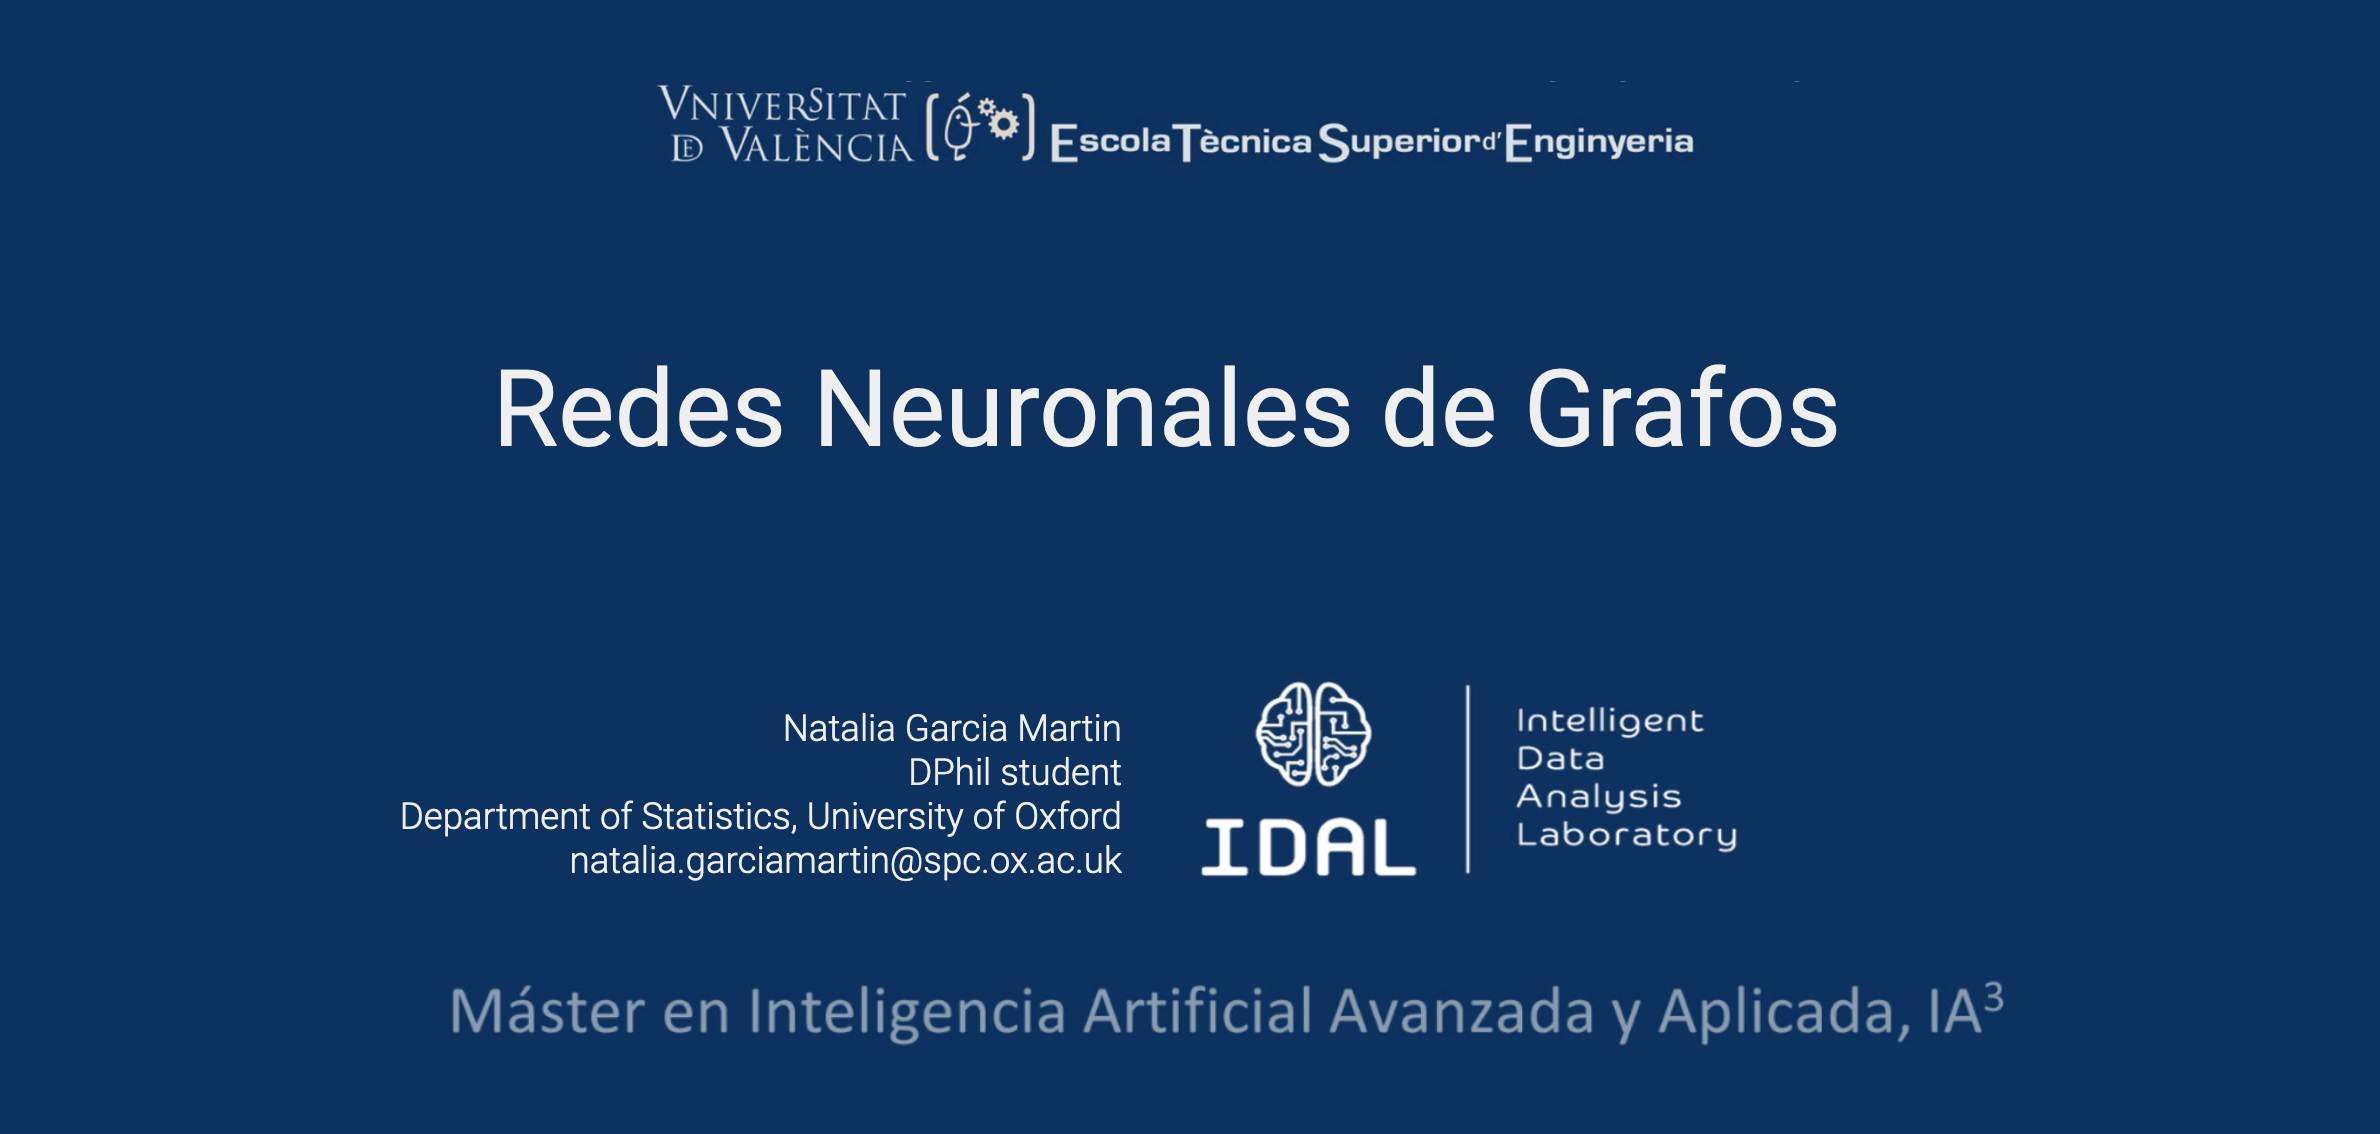

# **Introducción a grafos**
Un grafo es una forma de representar relaciones entre un conjunto de elementos. Los elementos se representan mediante nodos o vertices, y las relaciones binarias mediante aristas. Estas relaciones pueden ser bi- o uni- direccionales, dando lugar a grafos dirigidos y no dirigidos. 

Los grafos sirven para representar todo tipo de sistemas a nuestro alrededor, como nuestra red de amigos en una red social, conexiones neuronales, estructuras moleculares o relaciones comerciales entre países. Estas relaciones pueden ser simples o ponderadas. Por ejemplo, si un pais exporta bienes a otro pero no realiza importaciones del mismo, esta relacion seria unidireccional. Los paises con los que hubiese mayor relacion comercial podrian asimismo ser asignados pesos mayores. 

En la clase de hoy, trabajaremos solo con grafos no dirigidos y no ponderados. Trataremos los siguientes de temas:

*   Como construir y visualizar grafos con NetworkX
*   Introduccion a las graph neural networks
*   GNNs con PyTorch Geometric
*   GNNs mas complejas (graph attention networks, hiearchical pooling)
*   Ejercicios de GNNs para clasificacion de nodos (community detection) y de grafos



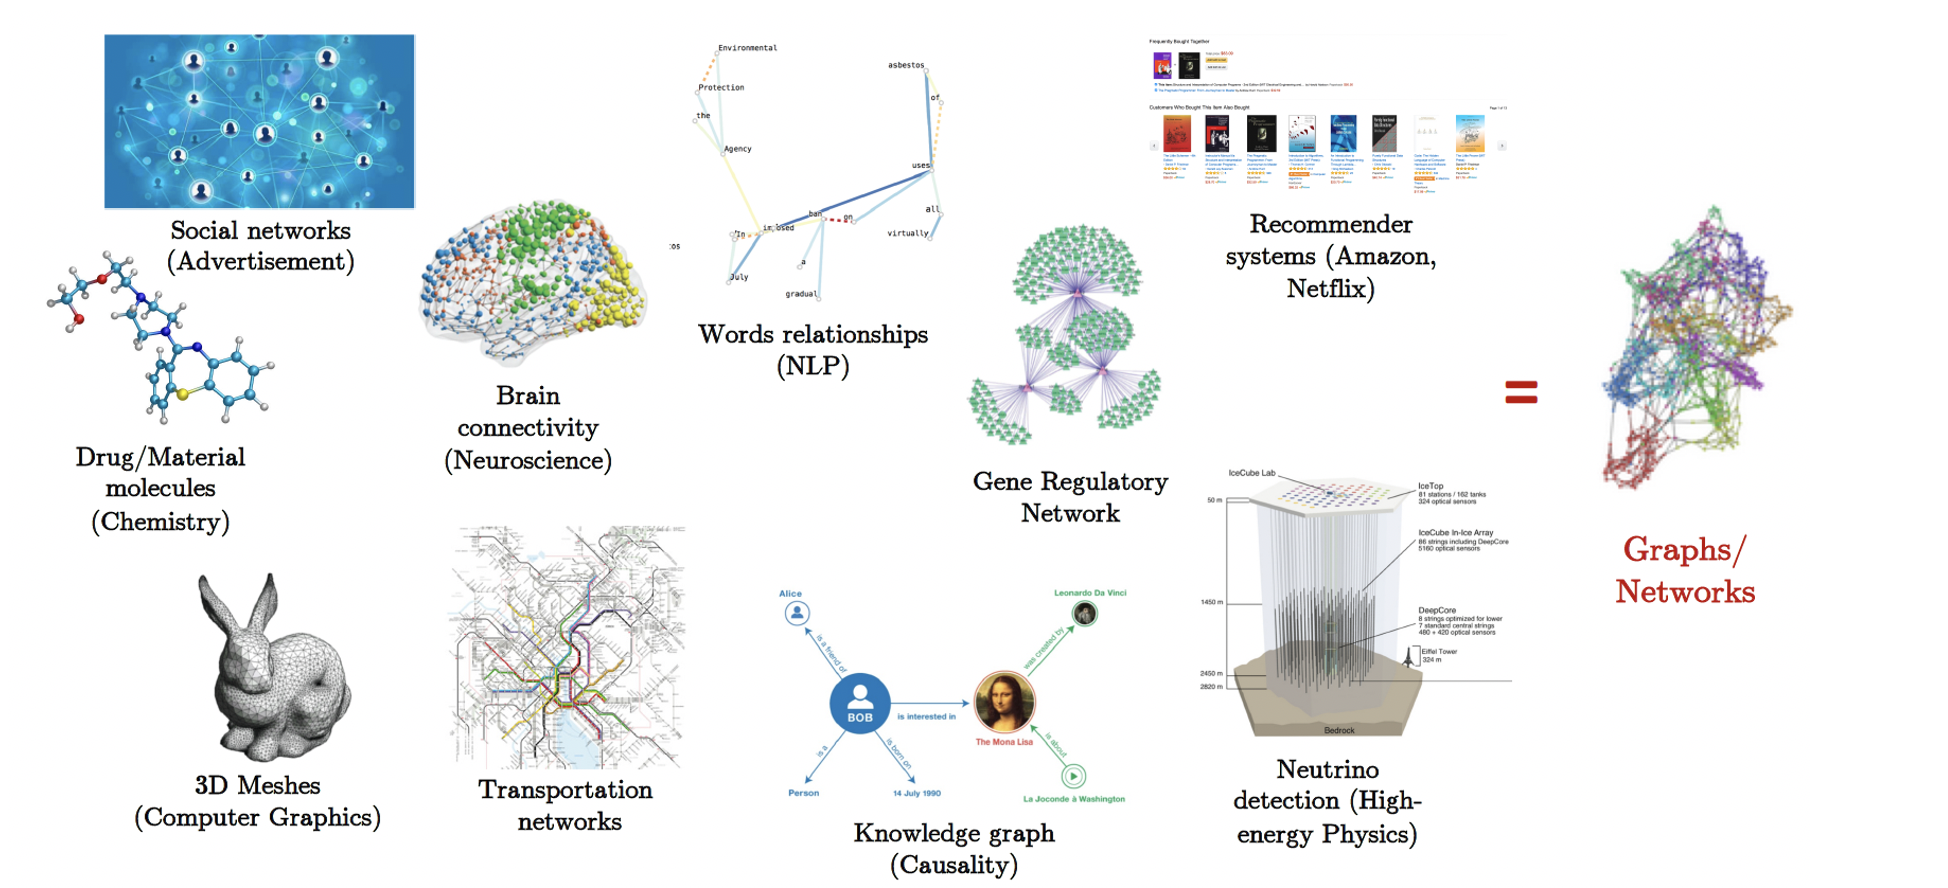

Podemos representar estas relaciones entre objetos mediante una matriz de adyacencia. En el caso de grafos no ponderados, la existencia de una arista entre dos nodos se representa con un 1. Ademas, si el grafo es no dirigido, esta matriz siempre sera simetrica.

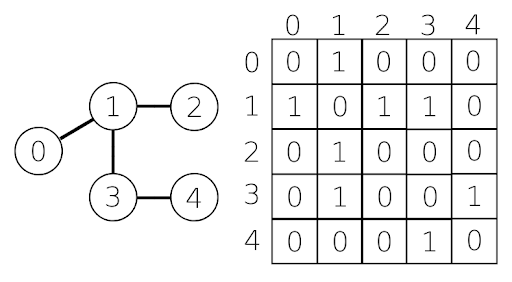

# **Analisis de redes con NetworkX**

NetworkX nos permite generar grafos con propiedades especificas. Por ejemplo, podemos generar un grafo aleatorio (tambien Erdős-Rényi o binomial) donde especificamos la probailidad de que haya un enlace entre dos nodos cualesquiera.
Lista de generadores de grafos que puedes seleccionar: https://networkx.org/documentation/stable/reference/generators.html

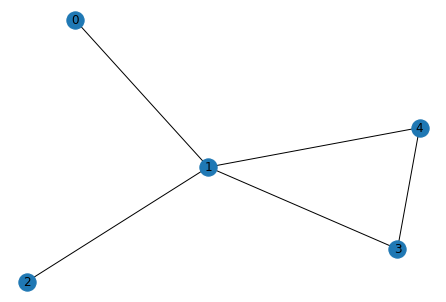

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
  
G = nx.erdos_renyi_graph(5, 0.5) # 5 nodos, probabilidad de vertice 0.5
nx.draw(G, with_labels=True)
plt.show()

In [ ]:
nx.adjacency_matrix(G).todense()

matrix([[0, 1, 1, ..., 1, 0, 0],
        [1, 0, 1, ..., 0, 0, 0],
        [1, 1, 0, ..., 0, 1, 0],
        ...,
        [1, 0, 0, ..., 0, 1, 1],
        [0, 0, 1, ..., 1, 0, 1],
        [0, 0, 0, ..., 1, 1, 0]], dtype=int64)

Tambien podemos visualizar grafos conocidos. Por ejemplo, aqui visualizamos la famosa red social del club de Zachary. La red captura a 34 miembros de un club de karate, documentando los vínculos entre pares de miembros que interactuaron fuera del club. Durante el estudio surgió un conflicto entre el administrador "John A" y el instructor "Mr. Hi" (seudónimos), que llevó a la división del club en dos. La mitad de los miembros formaron un nuevo club alrededor del Sr. Hi; los miembros de la otra parte encontraron un nuevo instructor o abandonaron el kárate. Según los datos recopilados, Zachary asignó correctamente a todos los miembros del club menos uno a los grupos a los que se unieron después de la separación.

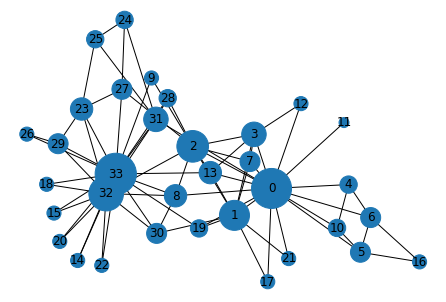

In [ ]:
G = nx.karate_club_graph()
degree = dict(nx.degree(G))
nx.draw(G, nodelist=degree.keys(), node_size=[v * 100 for v in degree.values()], with_labels=True)
plt.show()

In [ ]:
print(f'Number of nodes: {G.number_of_nodes()}')
print(f'Number of edges: {G.number_of_edges()}')
print(f'Average node degree: {G.number_of_edges() / G.number_of_nodes():.2f}')
print(f'Average clustering coefficient: {nx.average_clustering(G):.2f}')

Number of nodes: 34
Number of edges: 78
Average node degree: 2.29
Average clustering coefficient: 0.57


Para generar un grafo determinado, podemos definir la matriz de adyacencia o los vertices existentes. Por ejemplo, podemos construir el grafo que hemos mostrado anteriormente de las siguientes dos formas:

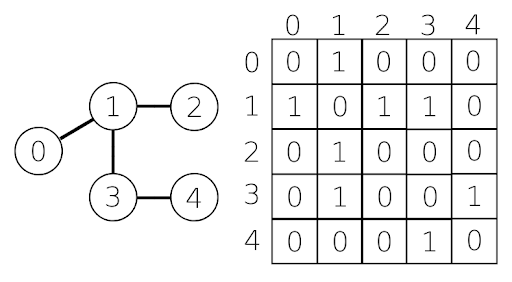

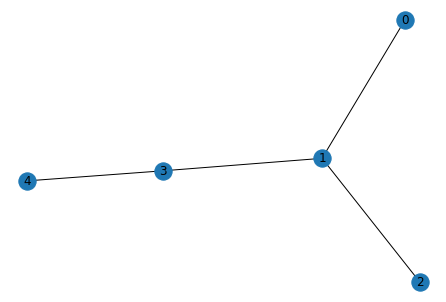

In [ ]:
G = nx.Graph()
G.add_edges_from([("0","1"), ("1","2"), ("1", "3"), ("3","4")])
nx.draw(G, with_labels=True)
plt.show()

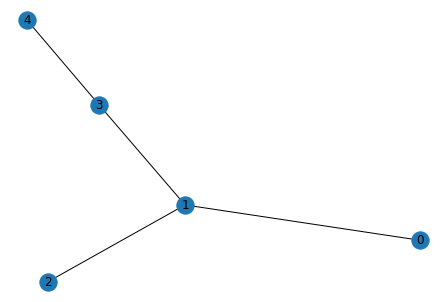

In [ ]:
import numpy as np
A = np.matrix([[0, 1, 0, 0, 0],
               [1, 0, 1, 1, 0], 
               [0, 1, 0, 0, 0], 
               [0, 1, 0, 0, 1], 
               [0, 0, 0, 1, 0]])
G = nx.from_numpy_matrix(A)
nx.draw(G, with_labels=True)
plt.show()

# **Ejercicio 1: visualizacion de grafos con NetworkX**

Otro grafo que podemos descargar en NetworkX es la red de co-ocurrencias de los personajes de Los Miserables. Podemos descargarla con nx.generators.les_miserables_graph(). Un nodo representa un personaje, y un enlace entre ellos hace referencia a su aparencia en el mismo capitulo del libro. 

¿Que personaje tiene mas interacciones con otros?

In [3]:
# G = nx.generators.les_miserables_graph()

# **Ejemplo en Imagen Medica**

Tenemos imagenes de tumores de cancer de colon que han sido escaneados con distintos anticuerpos para estudiar la presencia y distribucion de distintas celulas immunitarias.

1.   Segmentacion de las celulas usando CNNs (U-Net)
2.   Calculo de la distancia entre las celulas
3.   Determinacion de una distancia especifica para considerar dos celulas como vecinas/elementos que interactuan y generar vertices entre ellas. Teniendo en cuenta el average degree que queremos aproximadamente (ej. cada celula conectada a otras 5 celulas) y teniendo en cuenta el numero de componentes conectados, ya que algunos atributos de los grafos son muy complejos de calcular cuando el grafo no es conectado.
4.   Uso de NetworkX para construir y visualizar el grafo correspondiente, y para calcular metricas como el numero de interacciones entre celulas de varios tipos, su dispersion, mixing, clustering, etc.



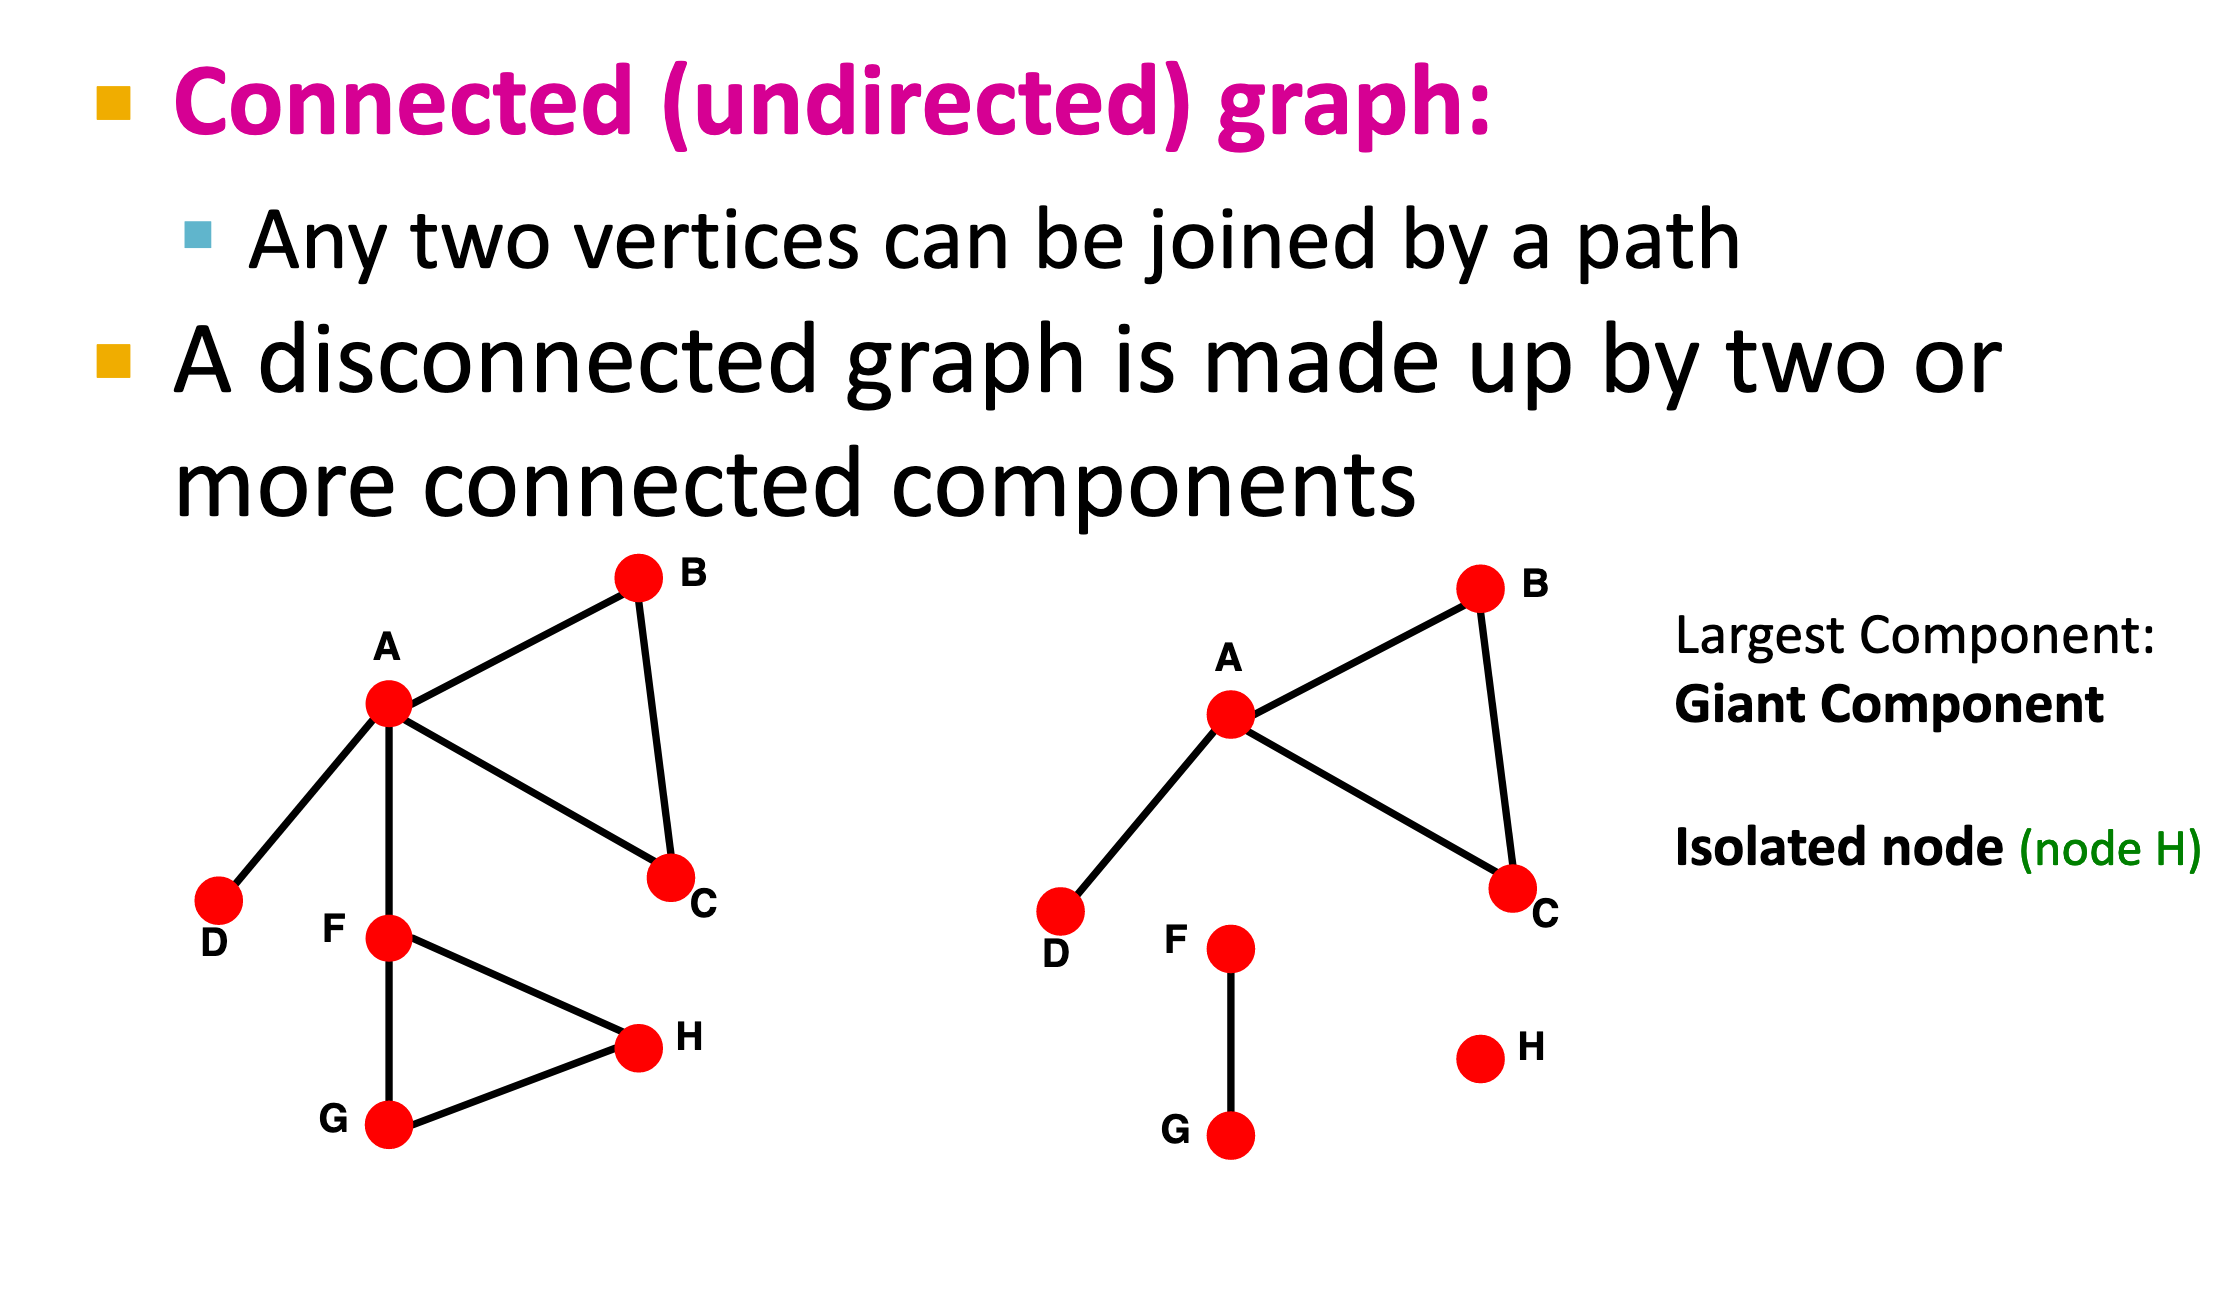

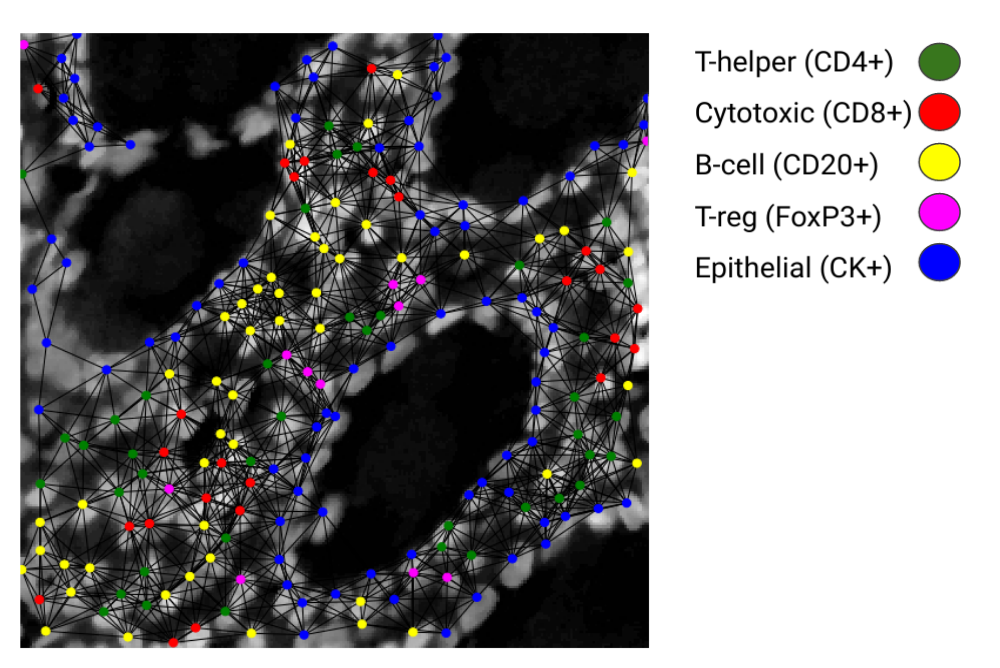

# **Redes neuronales de grafos**

A diferencia de otros tipos de datos como imagenes o texto que se pueden representar como secuencias o grids, en las estructuras de grafos no tenemos un orden fijo o de referencia y tenemos que tener en cuenta la topologia compleja de la red. Generalmente, es mas comun que exista enlaces entre nodos que compartan caracteristicas similares y conexiones en comun y que exista mayor influencia entre los mismos. Las redes neuronales de grafos o GNNs incorporan esta concepto.

Entre las aplicaciones de GNNs, destacan:
- Clasificacion de nodos (ej. clasificacion de documentos en base al numero de citaciones entre ellos)
- Clasificacion de grafos (ej. clasificacion de moleculas)
- Generacion de grafos (ej. descubrimiento de farmacos)
- Deteccion de comunidades (ej. deteccion de grupos sociales)
- Prediccion de enlaces (ej. recomendacion de amigos en una red social, prediccion de interacciones entre proteinas)



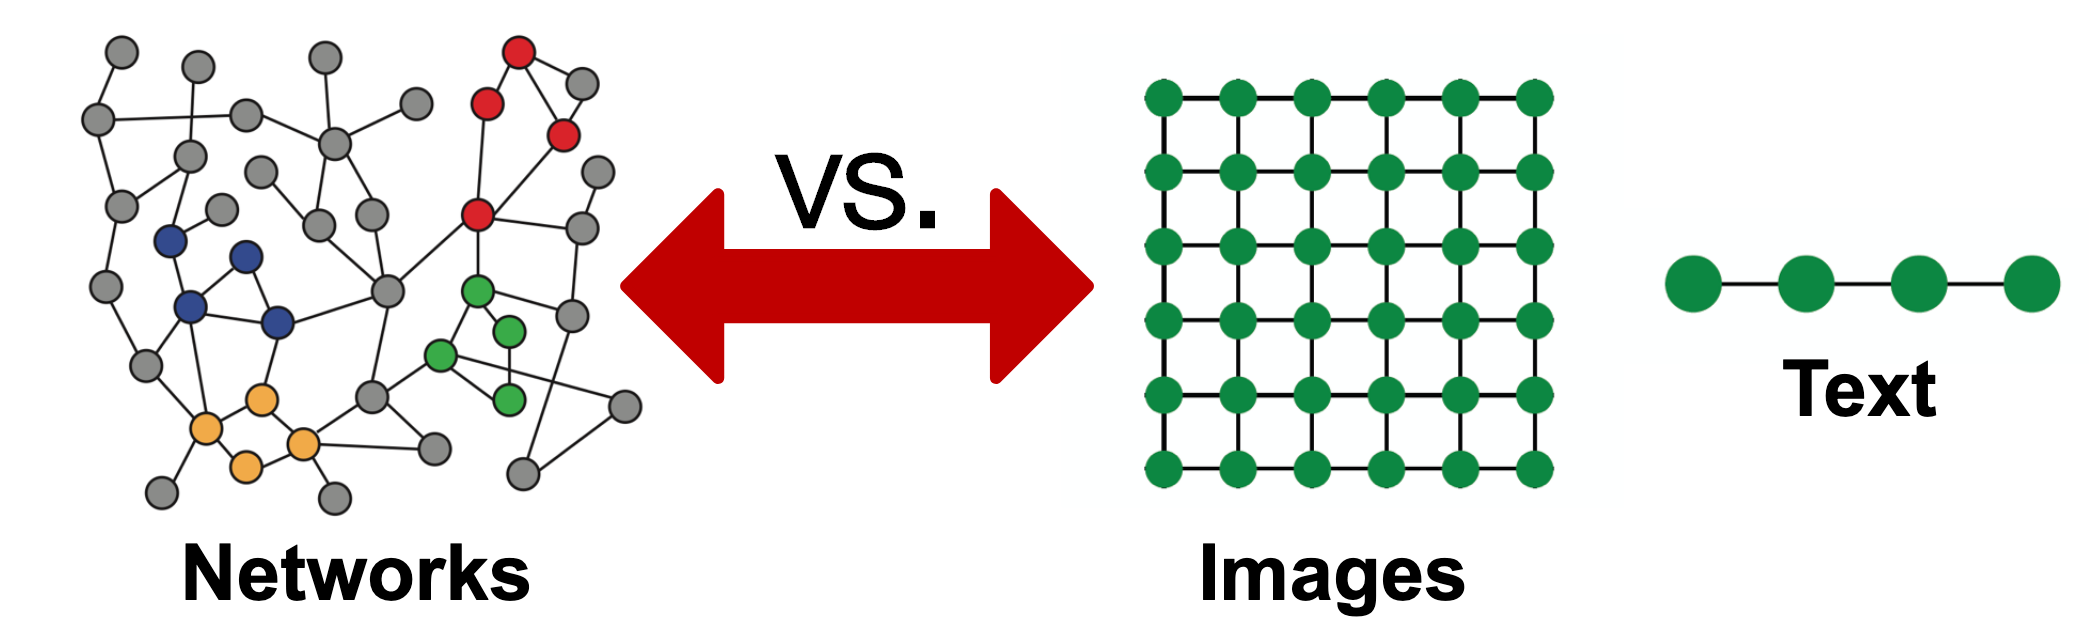

**Graph Convolutional Networks**

¿Podemos simplemente alimentar una red neuronal (eg. multilayer perceptron) usando la matriz de adyacencia como entrada? 

No, porque la matriz de adyacencia, a diferencia del grafo en si, no tiene invariancia de permutación, es decir, depende del orden arbitrario de las filas / columnas en la matriz de adyacencia.



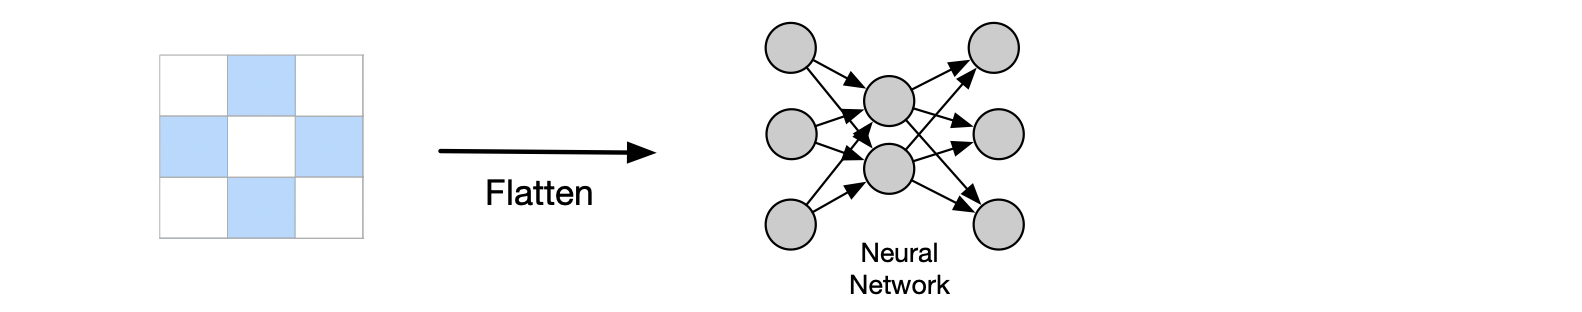

¿Como definimos entonces la convolucion en un grafo?
Utilizamos el concepto de message passing. 

1.   **Message passing step.** Transformamos los “mensajes” $h_i$ de los vecinos $i \in N(v)$: $𝑊_iℎ_i $ usando una matriz de pesos
2.   **Combination step.** Los sumamos y añadimos al embedding actual $h_v + ∑_i 𝑊_iℎ_i$



*   La matrix X de dimension mxn (num_caracteristicas x num_nodos) contiene los vectores de caracteristicas para cada nodo que corresponden a los embeddings iniciales.
*   Estos embeddings son actualizados con cada capa de red convolucional por la matriz de pesos $W_l$ con dimension (num_catacteristicas x num_hiddenlayers) hasta obtener un embedding final H. 

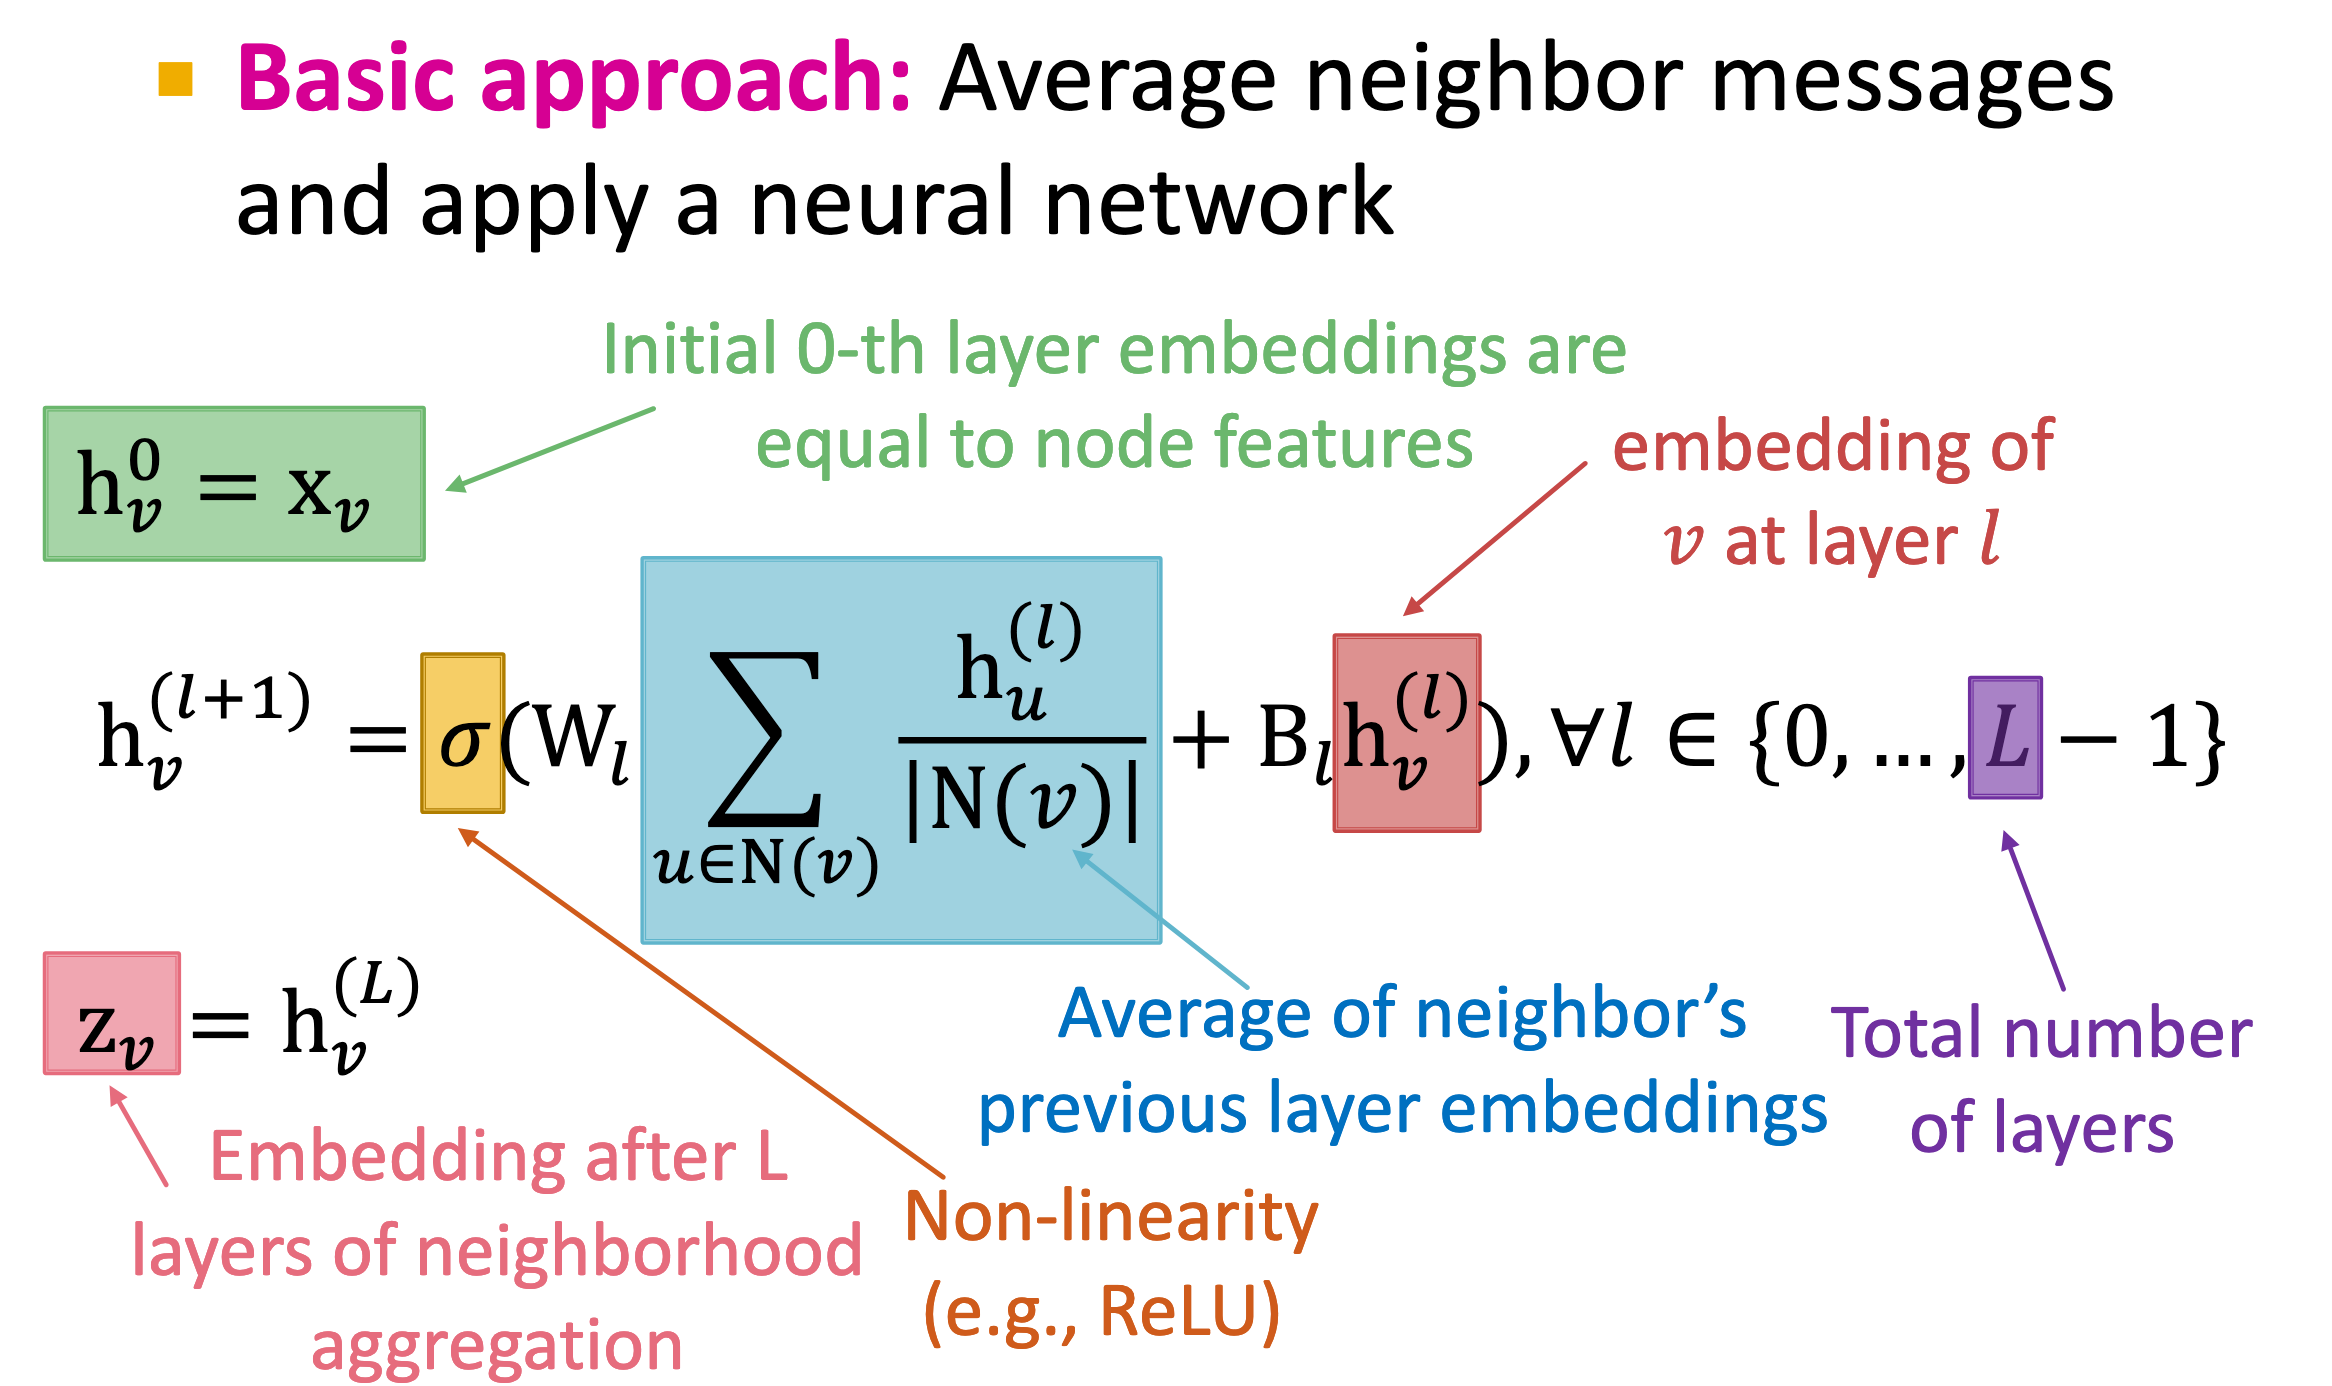

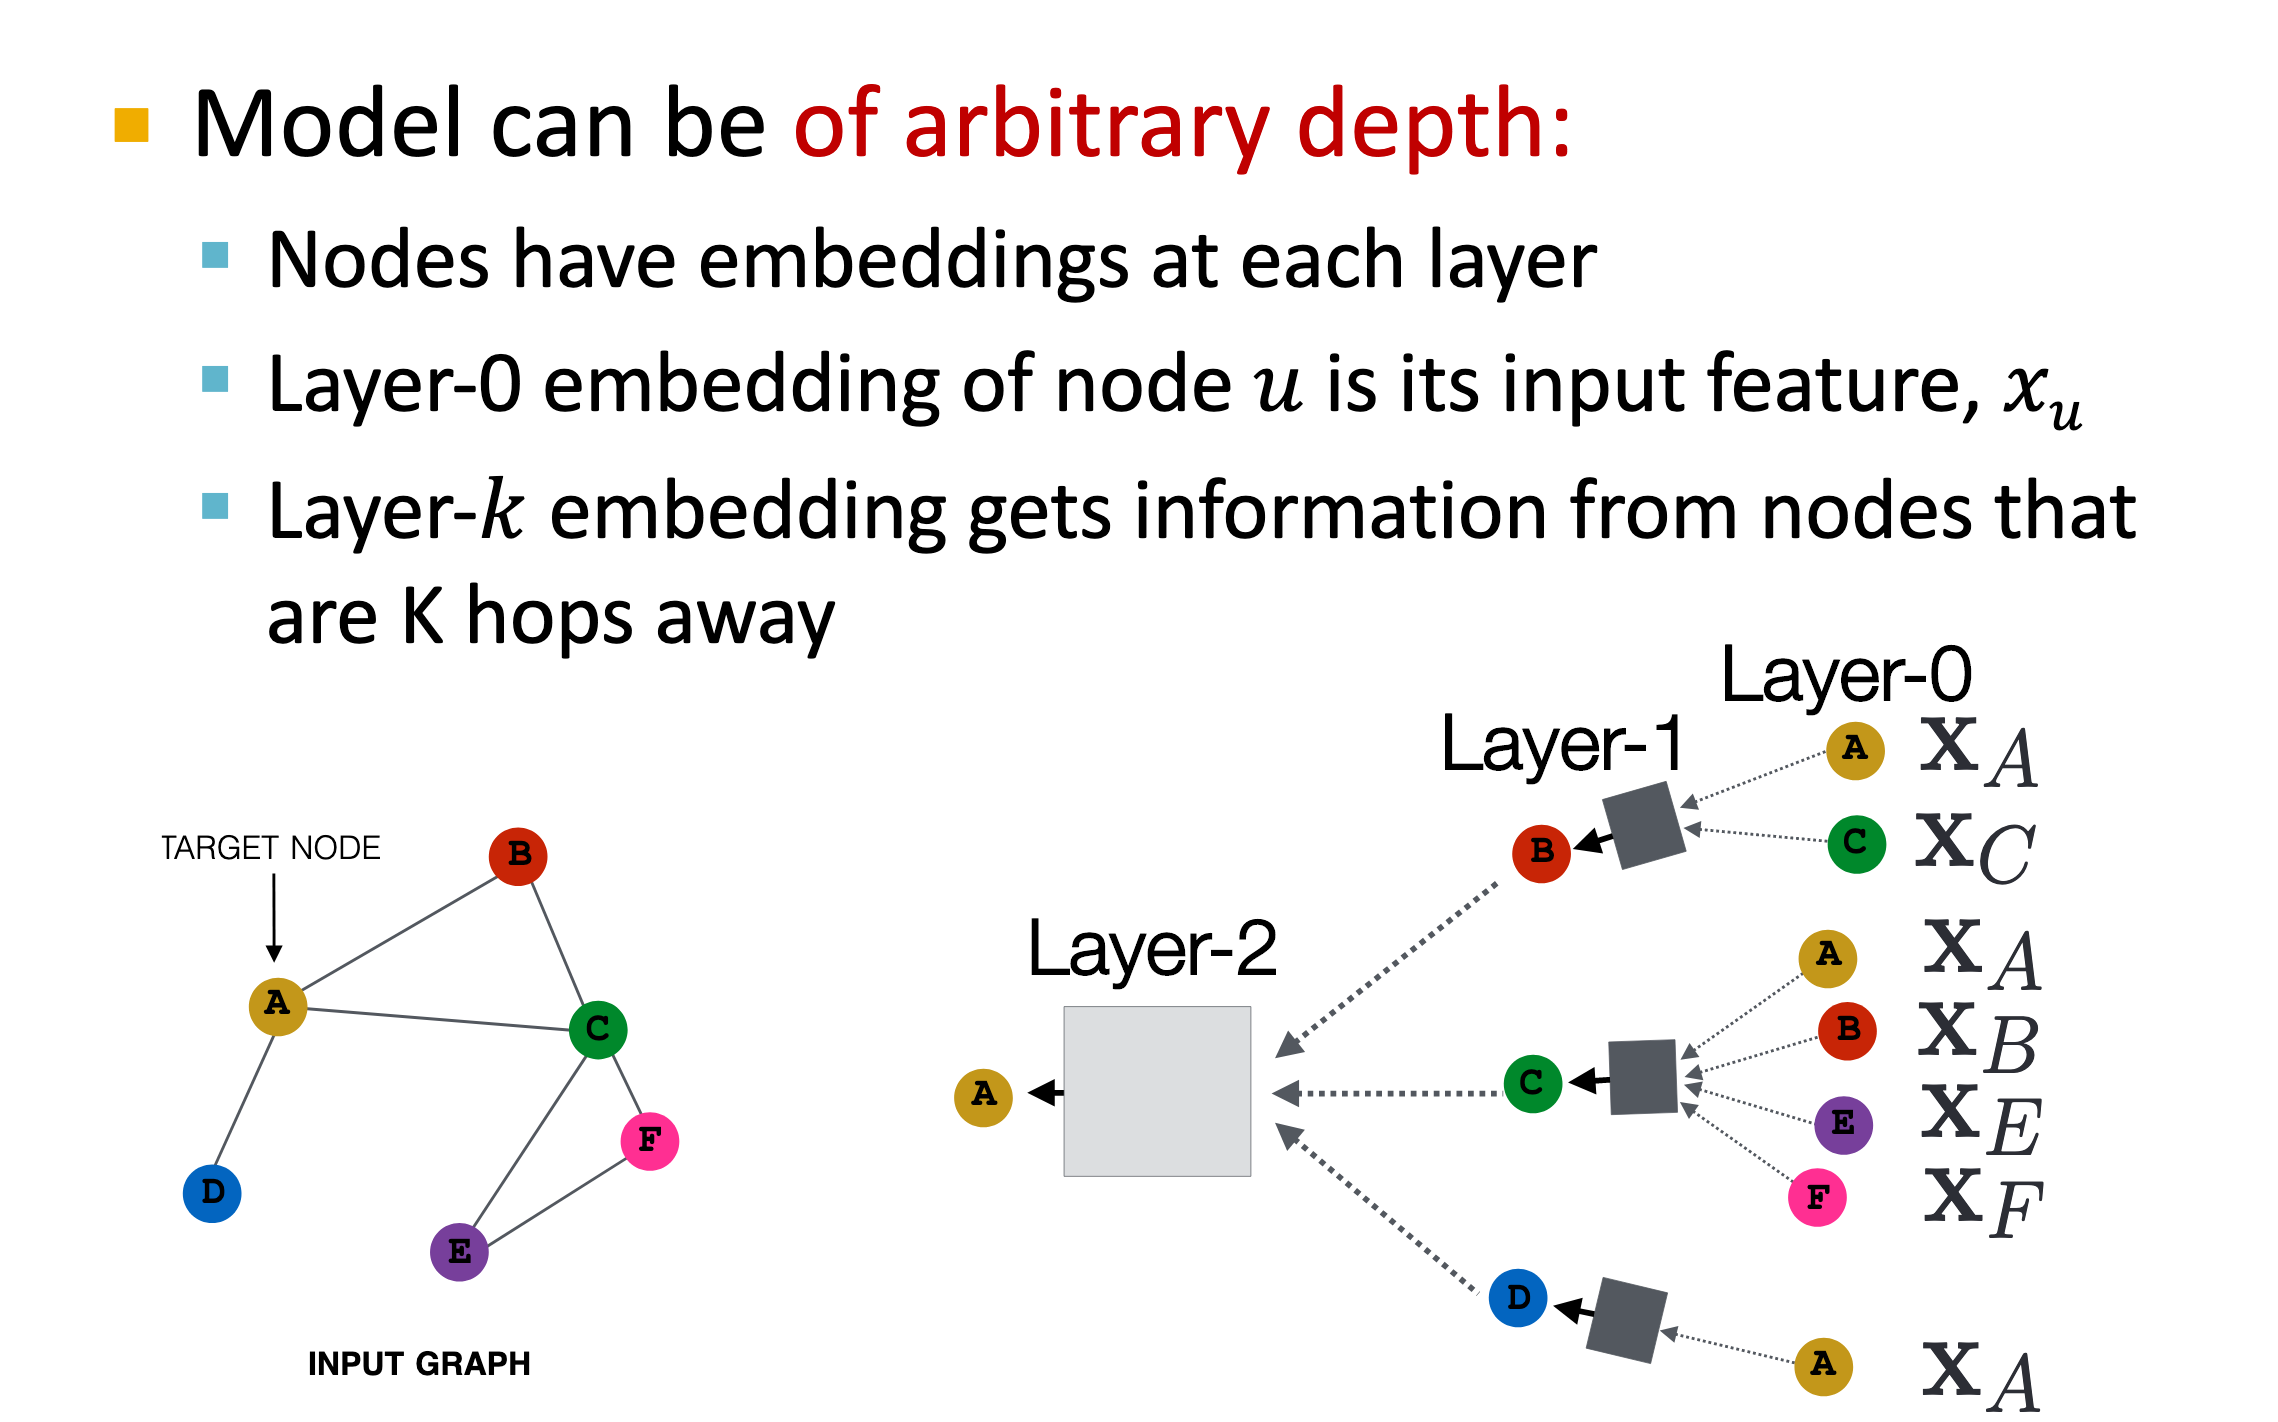

Formulando esta idea con matrices:
- $H^{(l)}=[h_1^{(l)}, ... h_{|V|}^{(l)}]^T$
- Para cada target node $v$, en la capa $l$, la suma de los embeddings de los neighbours es equivalente a multiplicar la matriz de embeddings actuales $H^{(l)}$ por la fila de la matriz de adyacencia correspondiente at target node.

    $\sum_{u \in N_v}h_u^{(l)}=A_{v, :}H^{(l)}$

- Como cada nodo tiene un grado distinto (algunos tienen pocas conexiones, otros muchas), normalizamos el grado de los nodos para evitar problemas con los gradientes mas adelante. Definimos la matriz diagonal D = grado(v) = |N(v)| (cada entrada de la diagonal especifica la cardinalidad de la vecinidad de cada nodo v).
- La inversa $D^{-1}$ = 1/|N(v)| tambien es diagonal por lo que $D^{-1}A$ es dispersa y podemos usar algoritmos para multiplicacion de matrices dispersas.
- Tras agregar el mensaje de los neighbours con el embedding actual del nodo, aplicamos una funcion de activacion.
- Si la matriz de adyacencia contiene self-loops y obtamos por incorporar solo una matriz de pesos W, entonces podemos escribir 
$H^{l+1}=\sigma (\tilde{A}H^{(l)}W_l^T)$
- Para la clasificación de nodos, la representación de nodos H(v) de la iteración final se utiliza para la predicción. 

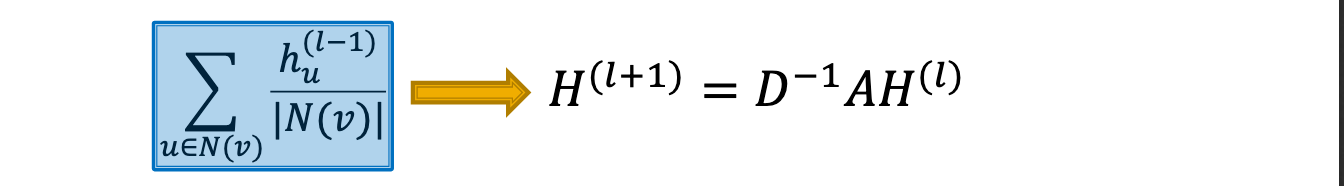

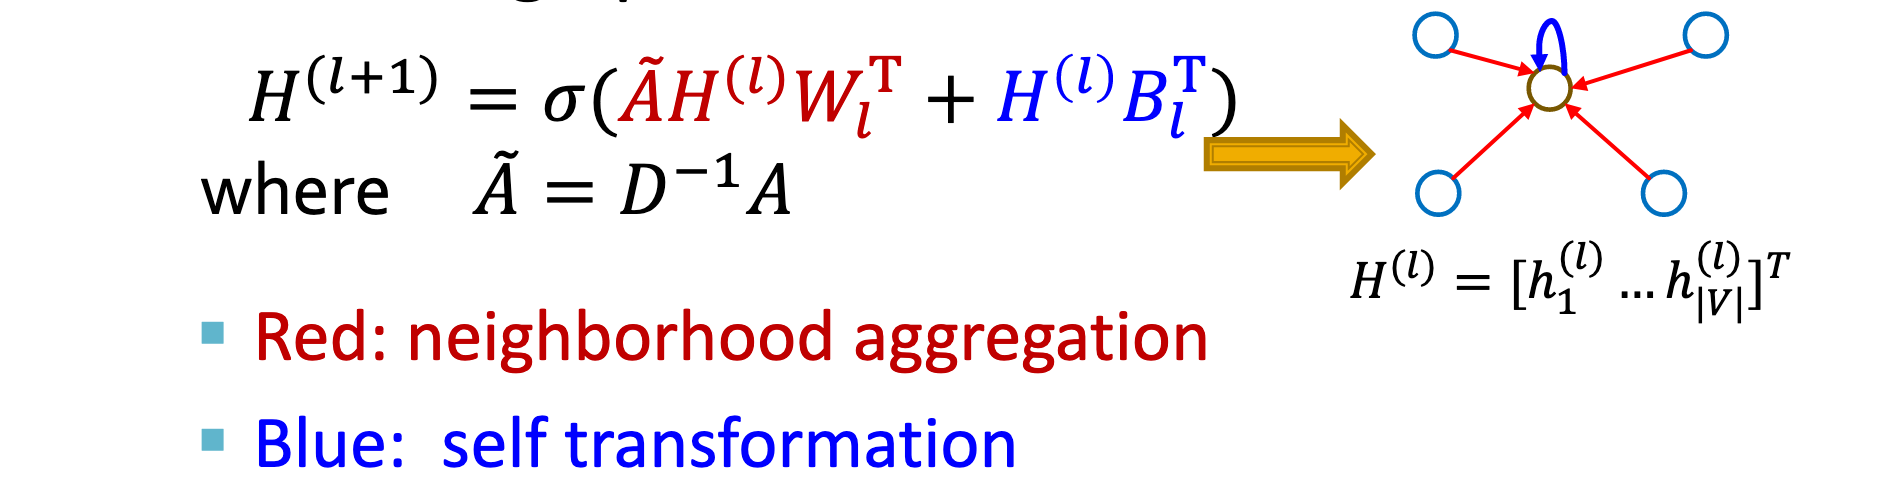

La formulacion anterior corresponde a la Graph Convolutional Network de Kipf et al (https://arxiv.org/abs/1609.02907).
Otras formulaciones como en GraphSAGE (https://cs.stanford.edu/people/jure/pubs/graphsage-nips17.pdf) o GIN (https://arxiv.org/abs/1810.00826) son mas flexibles. Por ejemplo, usando la nomenclatura de GIN:

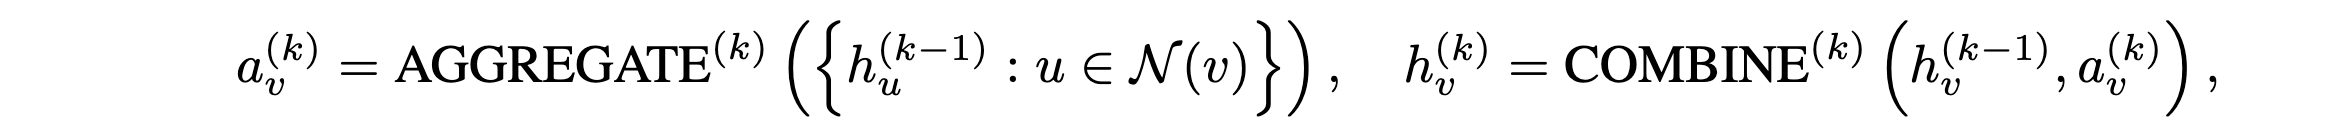

- Para el paso de AGGREGATE, en lugar de calcular la media de los embeddings de los vecinos, podriamos por ejemplo usar max pooling.
- Para el paso de COMBINE, en vez de una suma podriamos tener una concatenación $[h(k − 1)_v, a(k)_v]$ como en GraphSAGE.


Para la clasificación de nodos, la representación de nodos h(v) de la iteración final se utiliza para la predicción. Para la clasificación de grafos, necesitamos un embedding del grafo en si, no de cada nodo. La función READOUT agrega características de nodo de la iteración final para obtener la representación del gráfico completo.

> $h_G = READOUT ({h(v)∣v∈G})$

READOUT puede ser:
- una función simple como un max global pooling o mean global pooling, 
- un concatenation de todos los final embeddings,
- o una función de agrupación a nivel de grafo más sofisticada (hierahchical pooling: Ying et al., 2018; Zhang et al., 2018).

# **Introduccion a PyTorch Geometric**


Los grafos en PyTorch Geometric contienen los siguientes principales atributos:

*    **x**: matriz que contiene los vectores de caracteristicas de cada nodo, con dimensiones [num_nodes, num_node_features]
*    **edge_index**: lista de pares de nodos conectados, con dimension [2, num_edges]. PyTorch utiliza el formato de coordenadas COO para matrices inversas, en el que solo hacemos referencia a las coordenadas distintas de cero en lugar de a la matriz completa de adyacencia.
*    **y**: etiquetas para cada nodo (para clasificacion de nodos) [num_nodes, *] o para el grafo (para clasificacion de grafos) [1, *]
*    **edge_attr**: caracteristicas de las aristas, con dimension [num_edges, num_edge_features] - no las usaremos en esta clase

Podemos construir un Data object a partir de un grafo de NetworkX, creando desde cero los tensores de PyTorch necesarios o descargando un benchmark dataset desde torch_geometric.datasets.

In [ ]:
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
!pip install -q torch-geometric
import torch

     |████████████████████████████████| 2.6MB 4.0MB/s 
     |████████████████████████████████| 1.4MB 3.9MB/s 
     |████████████████████████████████| 225kB 4.3MB/s 
     |████████████████████████████████| 235kB 40.5MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 


### **1. Usando la funcion from_networkx**

In [ ]:
from torch_geometric import utils

G = nx.karate_club_graph()
graph_data = utils.from_networkx(G)
graph_data

Data(club=[34], edge_index=[2, 156])

### **2. Construyendo los tensores desde cero en PyG**

In [ ]:
 from torch_geometric.data import Data

 # Estructura del grafo (vertices). Ejemplo de 3 nodos 0, 1, 2 con 2 aristas bidireccionales (0,1) y (1,2).
 edge_index = torch.tensor([[0, 1, 1, 2],
                            [1, 0, 2, 1]], dtype=torch.long)

 # Node features con dimensiones [num_nodes, num_node_features]. En este ejemplo una sola feature.
 x = torch.tensor([[-1], [0], [1]], dtype=torch.float)
 data = Data(x=x, edge_index=edge_index) 
 data.edge_index

tensor([[0, 1, 1, 2],
        [1, 0, 2, 1]])

Para crear nuestro propio dataset, podemos usar la clase torch_geometric.data.Dataset como se explica en https://pytorch-geometric.readthedocs.io/en/latest/notes/create_dataset.html. Si no necesitamos guardar el dataset en el disco, podemos simplemente crear una lista de Data objects y pasarla al DataLoader:

In [ ]:
from torch_geometric.data import DataLoader

data1 = Data(x=x, edge_index=edge_index) 
data2 = Data(x=x, edge_index=edge_index) 
train_dataset = [data1, data2]
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)

### **3. PyTorch Geometric datasets**

PyTorch Geometric contiene muchos datasets conocidos que se pueden descargar directamente a traves de PyTG 
https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html. 


Vamos a descargar el dataset Cora que utilizaremos en el siguiente ejercicio para clasificacion de nodos. Se trata de una red de citas en la que los nodos representan documentos. Cada nodo está descrito por un vector de características de 1.433 palabras. Dos documentos están conectados si existe un vínculo de citación entre ellos. La tarea consiste en inferir la categoría de cada documento (7 categorías en total). 

Hacemos uso de las transformaciones de datos mediante transform=NormalizeFeatures(). Las transformaciones pueden utilizarse para modificar los datos de entrada antes de introducirlos en una red neuronal, por ejemplo, para normalizar o aumentar los datos. En este caso, normalizamos los vectores de características de entrada de la bolsa de palabras (Bag of Words o BOW).

In [ ]:
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures

dataset = Planetoid(root='data/Planetoid', name='Cora', transform=NormalizeFeatures())
print(f'Dataset: {dataset}:')
print('======================')
print(f'Numbero de grafos: {len(dataset)}')
print(f'Numbero de caracteristicas: {dataset.num_features}')
print(f'Numbero de clases: {dataset.num_classes}')

Processing...
Done!
Dataset: Cora():
Numbero de grafos: 1
Numbero de caracteristicas: 1433
Numbero de clases: 7


In [ ]:
data = dataset[0]
print(f'Numbero de nodos: {data.num_nodes}')
print(f'Number of aristas: {data.num_edges}')
print(f'Grado medio de los nodos: {data.num_edges / data.num_nodes:.2f}') # no multiplicamos por dos porque pytg ya incorpora cada edge dos veces

Numbero de nodos: 2708
Number of aristas: 10556
Grado medio de los nodos: 3.90


In [ ]:
data

Data(edge_index=[2, 10556], test_mask=[2708], train_mask=[2708], val_mask=[2708], x=[2708, 1433], y=[2708])

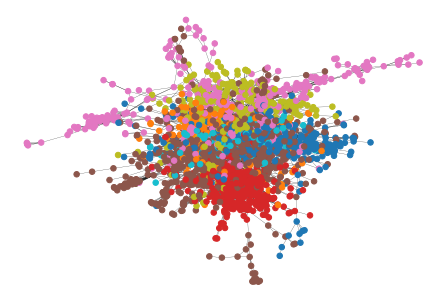

In [ ]:
# Vamos a visualizar el componente principal del grafo (el mayor componente conectado)
# Para ello usamos nx.connected_components

from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True) 
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
nx.draw(G0, node_color=data.y[list(Gcc[0])], with_labels=False, cmap=plt.cm.tab10, font_weight='bold', node_size=30, width=0.2)

# Ejercicio 2: clasificación de nodos

Utilizaremos el Cora dataset para una tarea de clasificacion de nodos semi-supervisada: dadas las etiquetas reales de un pequeño subconjunto de nodos, queremos inferir las etiquetas de todos los nodos restantes.

1.  Define una clase llamada GCN con el atributo 'hidden_channels' que contenga 3 capas de red convolucional de grafo GCNConv. Elige la funcion 
de activacion que prefieras. Recuerda que para capa GCNConv necesitamos pasar los embeddings x y los enlaces edge_index.
2.   Entrena el modelo durante 200 epochs con Adam optimiser y Cross Entropy Loss. Para calcular el loss escribimos data.train_mask para seleccionar solo data para training. Para calcular la accuracy, escribimos data.test_mask que selecciona solo los nodos para testing.

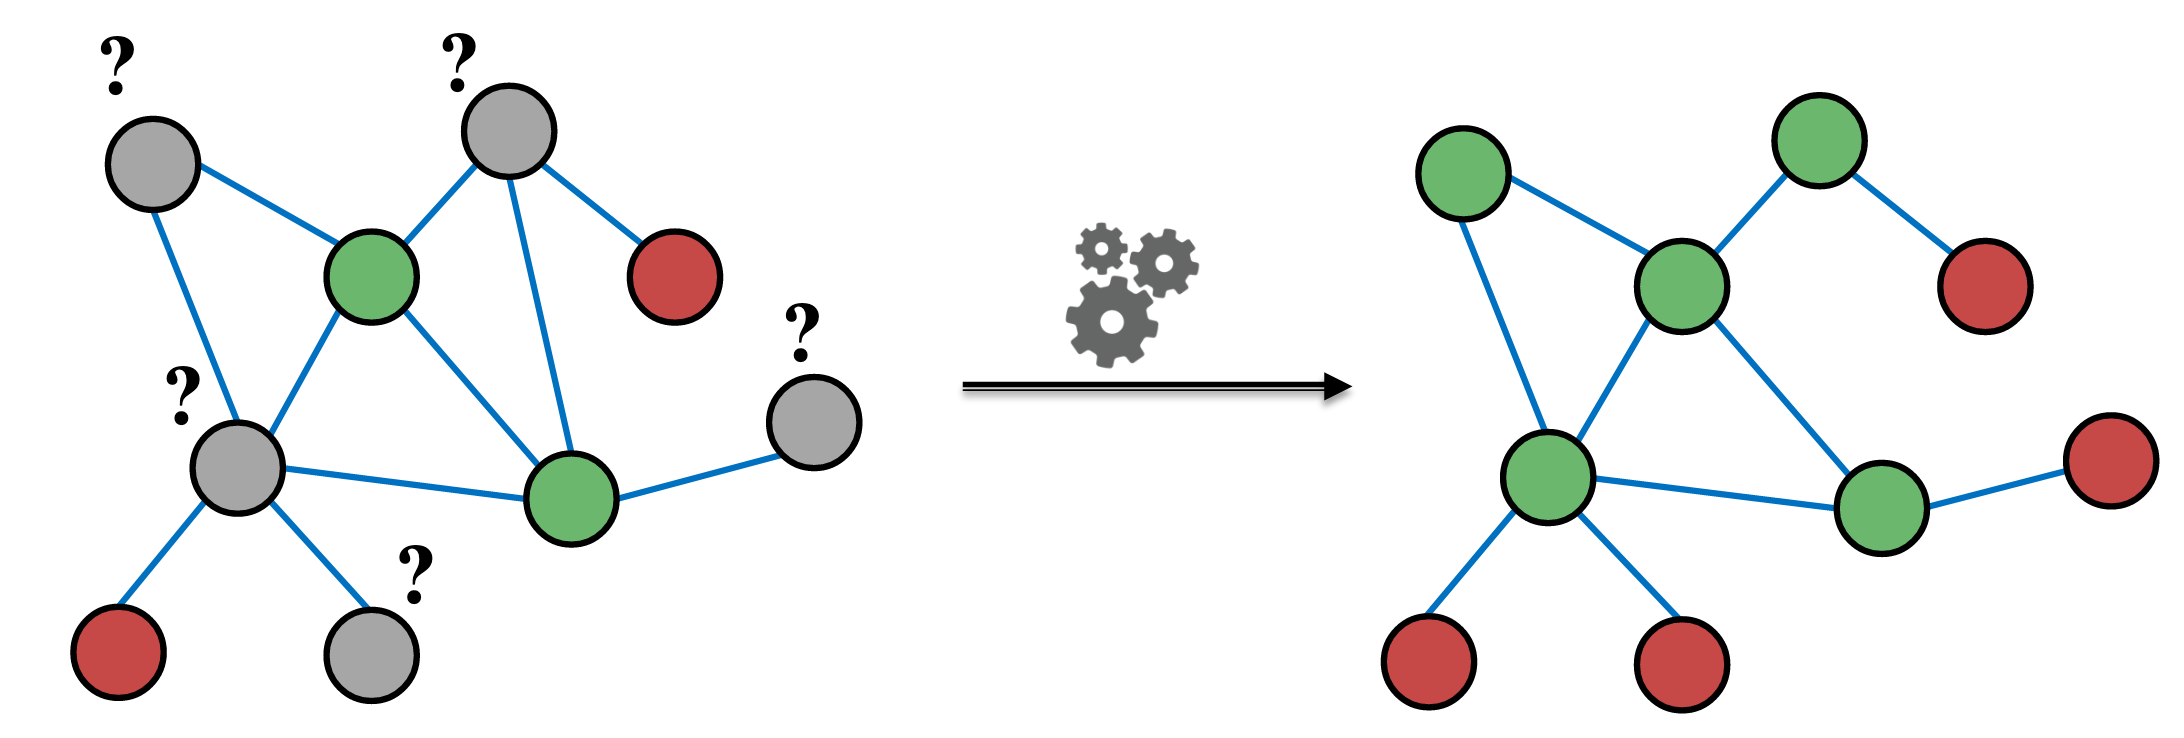

In [ ]:
print(f'Numbero de nodos: {data.num_nodes}')
print(f'Numero de nodos para training: {data.train_mask.sum()}') 
print(f'Proporcion de nodos para training: {int(data.train_mask.sum()) / data.num_nodes:.2f}')

Numbero de nodos: 2708
Numero de nodos para training: 140
Proporcion de nodos para training: 0.05


In [ ]:
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(#, #)
        self.conv2 = ###
        self.conv3 = ###

    def forward(self, x, edge_index):
        return x 

model = GCN(hidden_channels=16)
print(model)

GCN(
  (conv1): GCNConv(1433, 16)
  (conv2): GCNConv(16, 16)
  (conv3): GCNConv(16, 7)
)


Podemos visualizar el grafo de Cora, con los nodos de cada articulo coloreados en funcion a su clase, antes de entrenar el modelo. Utilizamos el metodo de reduccion de dimensiones TSNE para representar los embeddings de los nodos con 2 en vez de 7 dimensiones.

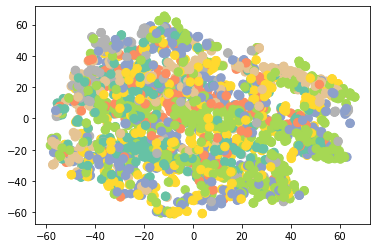

In [ ]:
from sklearn.manifold import TSNE

model = GCN(hidden_channels=16)
model.eval()

out = model(data.x, data.edge_index)
z = TSNE(n_components=2).fit_transform(out.detach().cpu().numpy())
plt.scatter(z[:, 0], z[:, 1], s=70, c=data.y, cmap="Set2")
plt.show()

In [ ]:
model = GCN(hidden_channels=16)
optimizer = ##
criterion = ##

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = ##
      loss = ##
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test():
      model.eval()
      out = model(data.x, data.edge_index)
      pred = ##  # Use the class with highest probability.
      test_correct = ##  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc

for epoch in range(1, 201):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')


Epoch: 001, Loss: 1.9460
Epoch: 002, Loss: 1.9438
Epoch: 003, Loss: 1.9410
Epoch: 004, Loss: 1.9365
Epoch: 005, Loss: 1.9313
Epoch: 006, Loss: 1.9251
Epoch: 007, Loss: 1.9180
Epoch: 008, Loss: 1.9099
Epoch: 009, Loss: 1.9009
Epoch: 010, Loss: 1.8907
Epoch: 011, Loss: 1.8792
Epoch: 012, Loss: 1.8667
Epoch: 013, Loss: 1.8528
Epoch: 014, Loss: 1.8374
Epoch: 015, Loss: 1.8205
Epoch: 016, Loss: 1.8020
Epoch: 017, Loss: 1.7818
Epoch: 018, Loss: 1.7600
Epoch: 019, Loss: 1.7364
Epoch: 020, Loss: 1.7109
Epoch: 021, Loss: 1.6836
Epoch: 022, Loss: 1.6544
Epoch: 023, Loss: 1.6233
Epoch: 024, Loss: 1.5905
Epoch: 025, Loss: 1.5561
Epoch: 026, Loss: 1.5200
Epoch: 027, Loss: 1.4825
Epoch: 028, Loss: 1.4437
Epoch: 029, Loss: 1.4036
Epoch: 030, Loss: 1.3626
Epoch: 031, Loss: 1.3207
Epoch: 032, Loss: 1.2781
Epoch: 033, Loss: 1.2349
Epoch: 034, Loss: 1.1913
Epoch: 035, Loss: 1.1474
Epoch: 036, Loss: 1.1033
Epoch: 037, Loss: 1.0592
Epoch: 038, Loss: 1.0153
Epoch: 039, Loss: 0.9715
Epoch: 040, Loss: 0.9282


In [ ]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.7640


Ahora podemos ver como el modelo genera embeddings similares para nodos de la misma categoria.

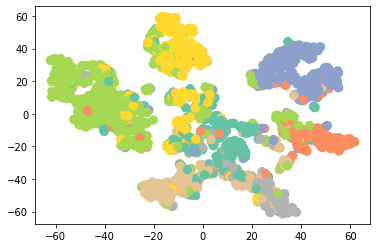

In [ ]:
model.eval()

out = model(data.x, data.edge_index)
z = TSNE(n_components=2).fit_transform(out.detach().cpu().numpy())
plt.scatter(z[:, 0], z[:, 1], s=70, c=data.y, cmap="Set2")
plt.show()

# Ejercicio para casa

(1) Vuelve a entrenar el modelo cambiando el numero de hidden channels, el numero de capas convolucionales y la funcion de activacion. 

(2) Modifica la capa convolucional por otras variantes como GINConv o GraphConv https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#convolutional-layers.

(3) Compara la performance del GCN con un multilayer perceptron. Este tendra en cuenta las caracteristicas de los embeddings iniciales de los nodos (es decir, el vector de caracteristicas del bag-of-words) pero no la topologia del grafo (las citaciones). 

# Ejercicio 3: clasificación de grafos



# GNNs con pooling jerárquico

Para clasificacion de grafos, los embeddings finales de cada nodo son combinados en un unico embedding para el grafo. Sin embargo, el uso de global pooling ignora la topologia del grafo. Por ello, se han desarrollado metodos de pooling jerarquico para redes neuronales de grafos. Un ejemplo es DiffPool (https://arxiv.org/abs/1806.08804).

En cada capa jerárquica, ejecutamos un modelo GNN para obtener los embeddings de los nodos. Luego usamos estos embeddings aprendidos para agrupar nodos juntos y ejecutamos otra capa GNN en este nuevo grafo. Este proceso se repite para las L layers y usamos la representación de salida final para clasificar el gráfico.

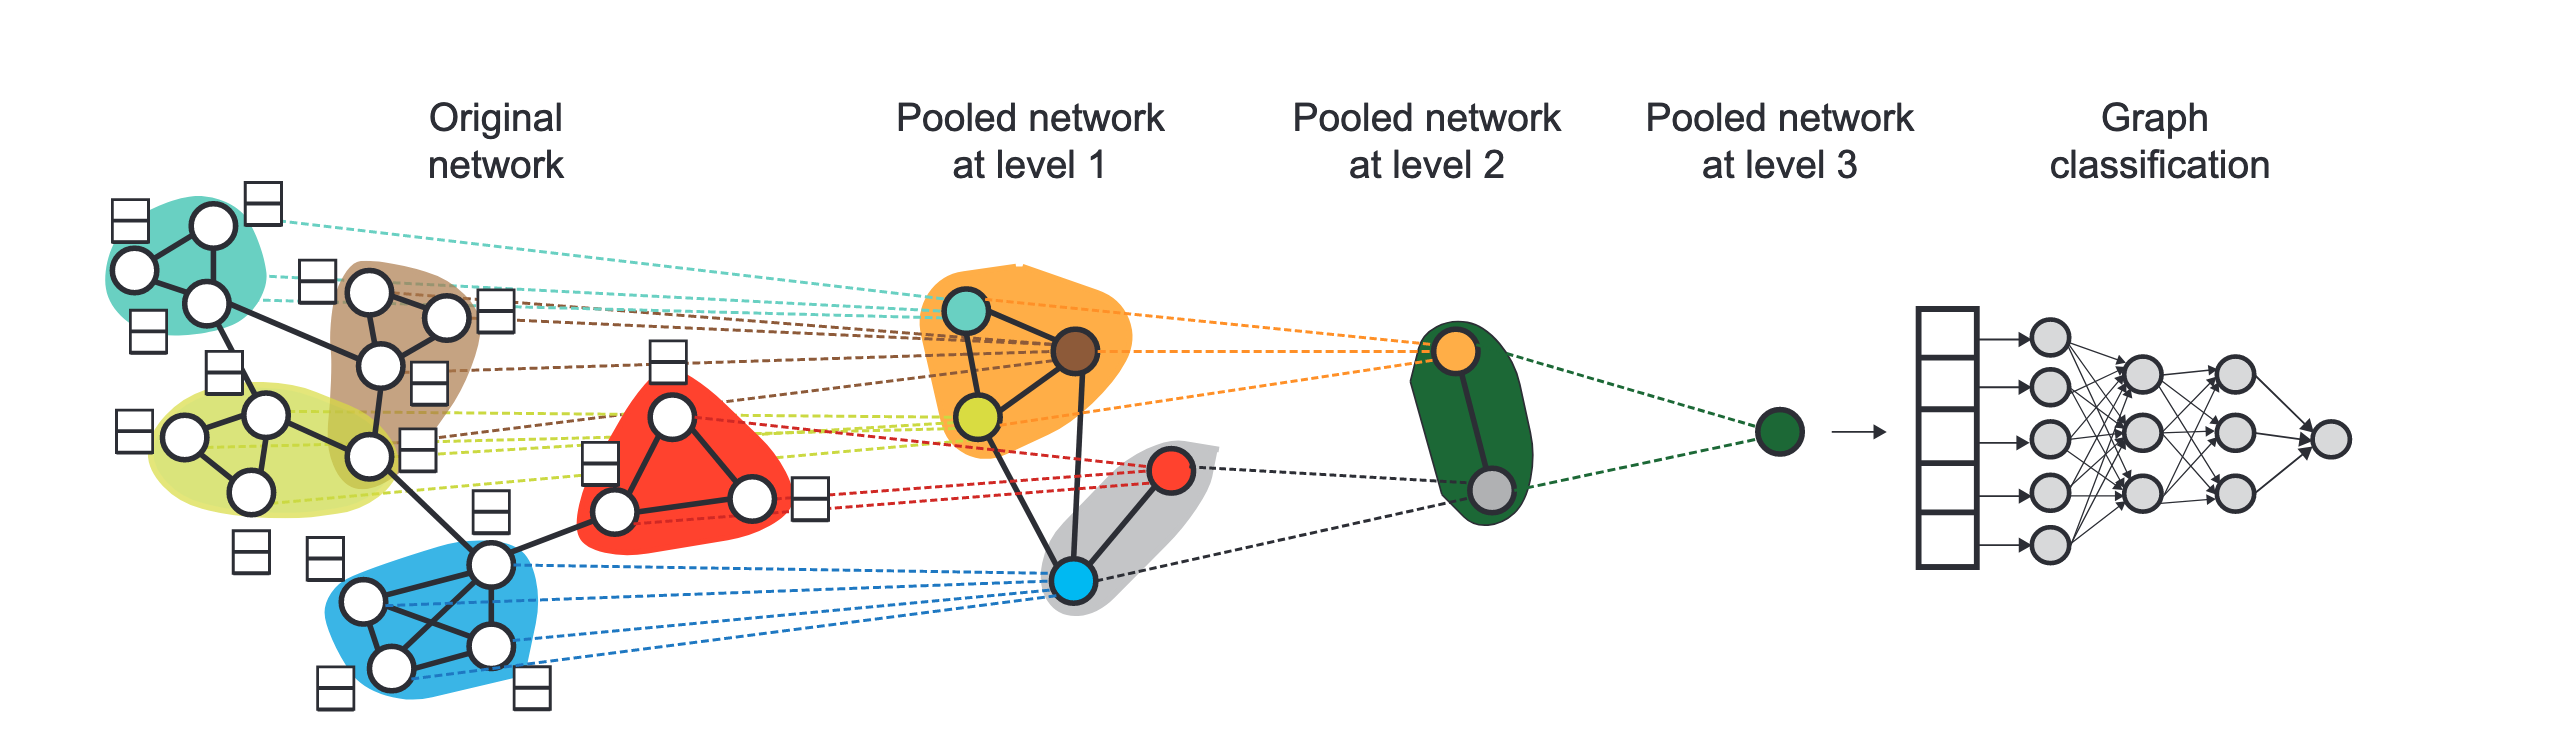

# Graph Attention Networks (GATs)

En las GCN que hemos visto antes, para obtener los embeddings actualizados en cada capa para un nodo $v$
1.  Multiplicamos el embedding de cada neighbour $u$ por la matriz de pesos $W\times h_u$
2.  Multiplicamos por la fila correspondiete a $v$ en la matriz de adyacencia normalizada $\frac{\sum_{u \in N(v)}}{N(v)}$
3.  Aplicamos la funcion de activacion $\sigma$


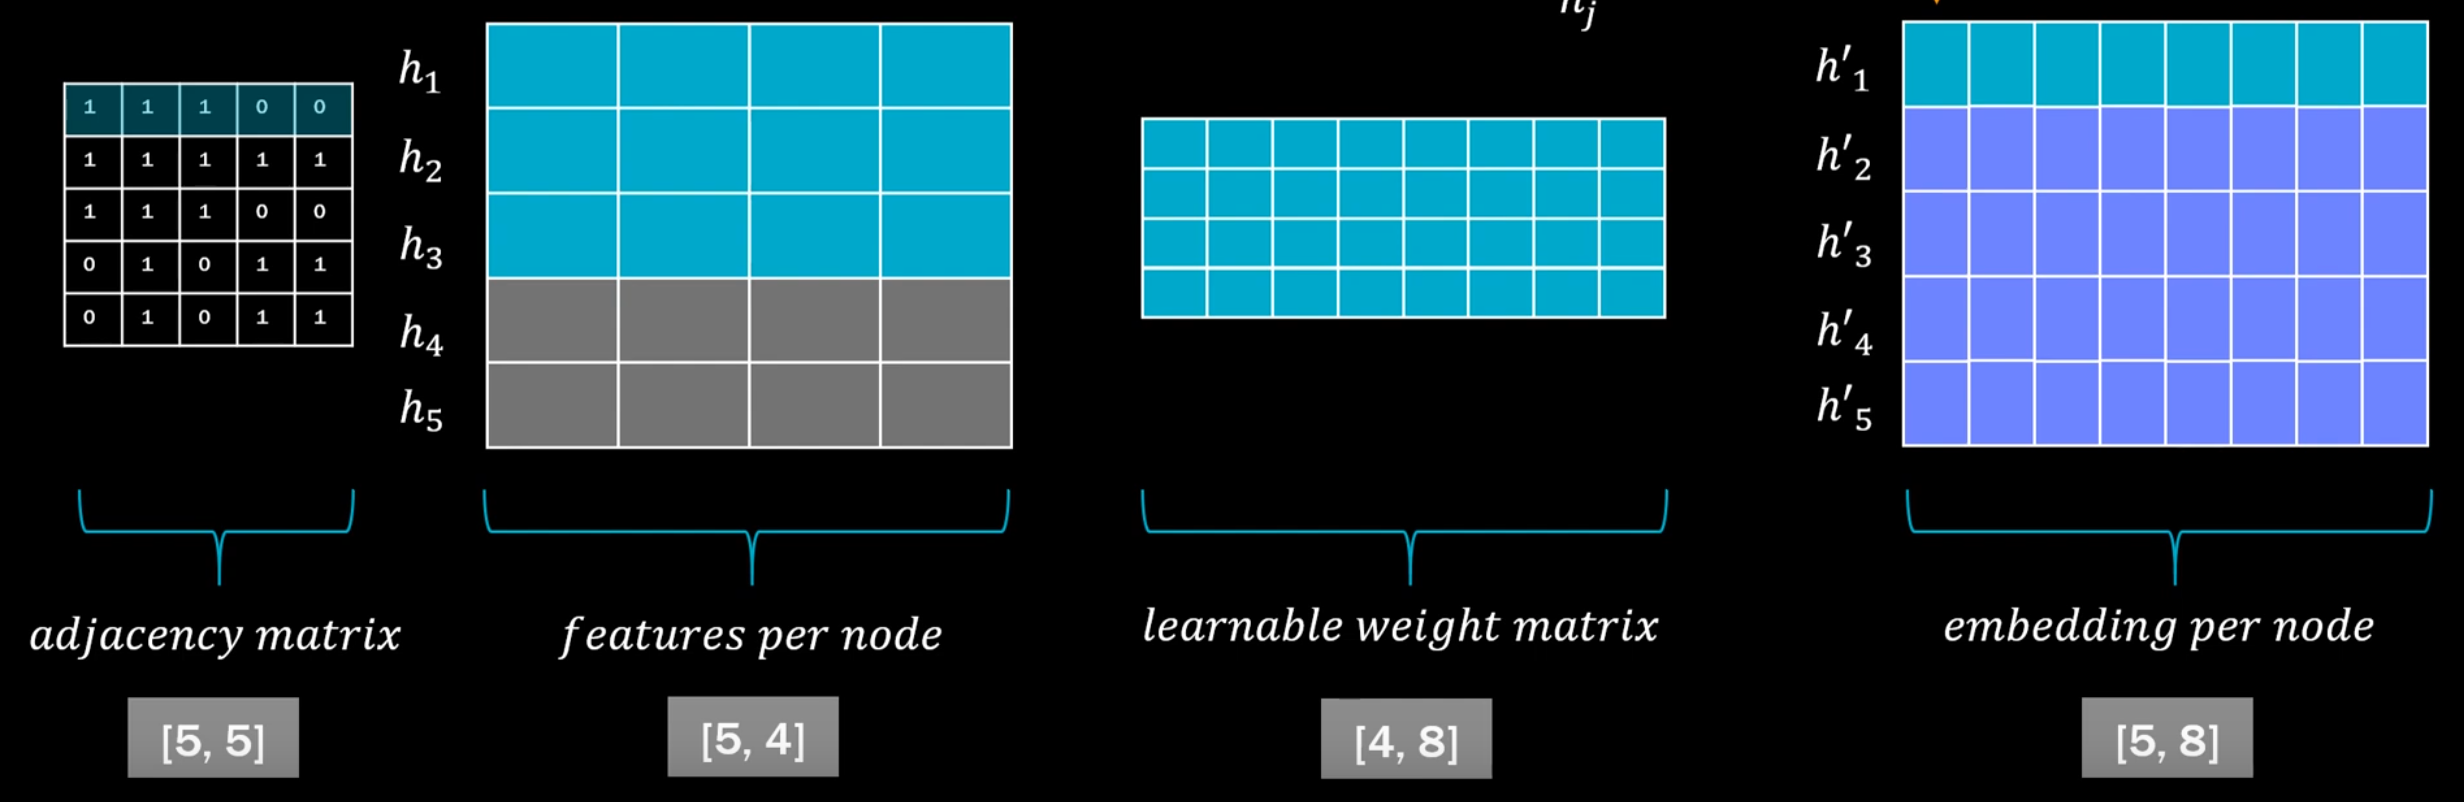

Es decir, el mensaje $Wh_u$ recibido por el nodo $v$ por parte del nodo $u$ recibe la importancia en funcion al numero de vecinos de $v$, pero todos los mensajes que llegan a $v$ reciben el mismo peso. En una situacion real, no todos los vecinos de los nodos son igualmente importantes. La atención se centra en las partes importantes de los datos de entrada y desvanece el resto. Qué parte de los datos es más importante depende del contexto y se aprende a través del entrenamiento.

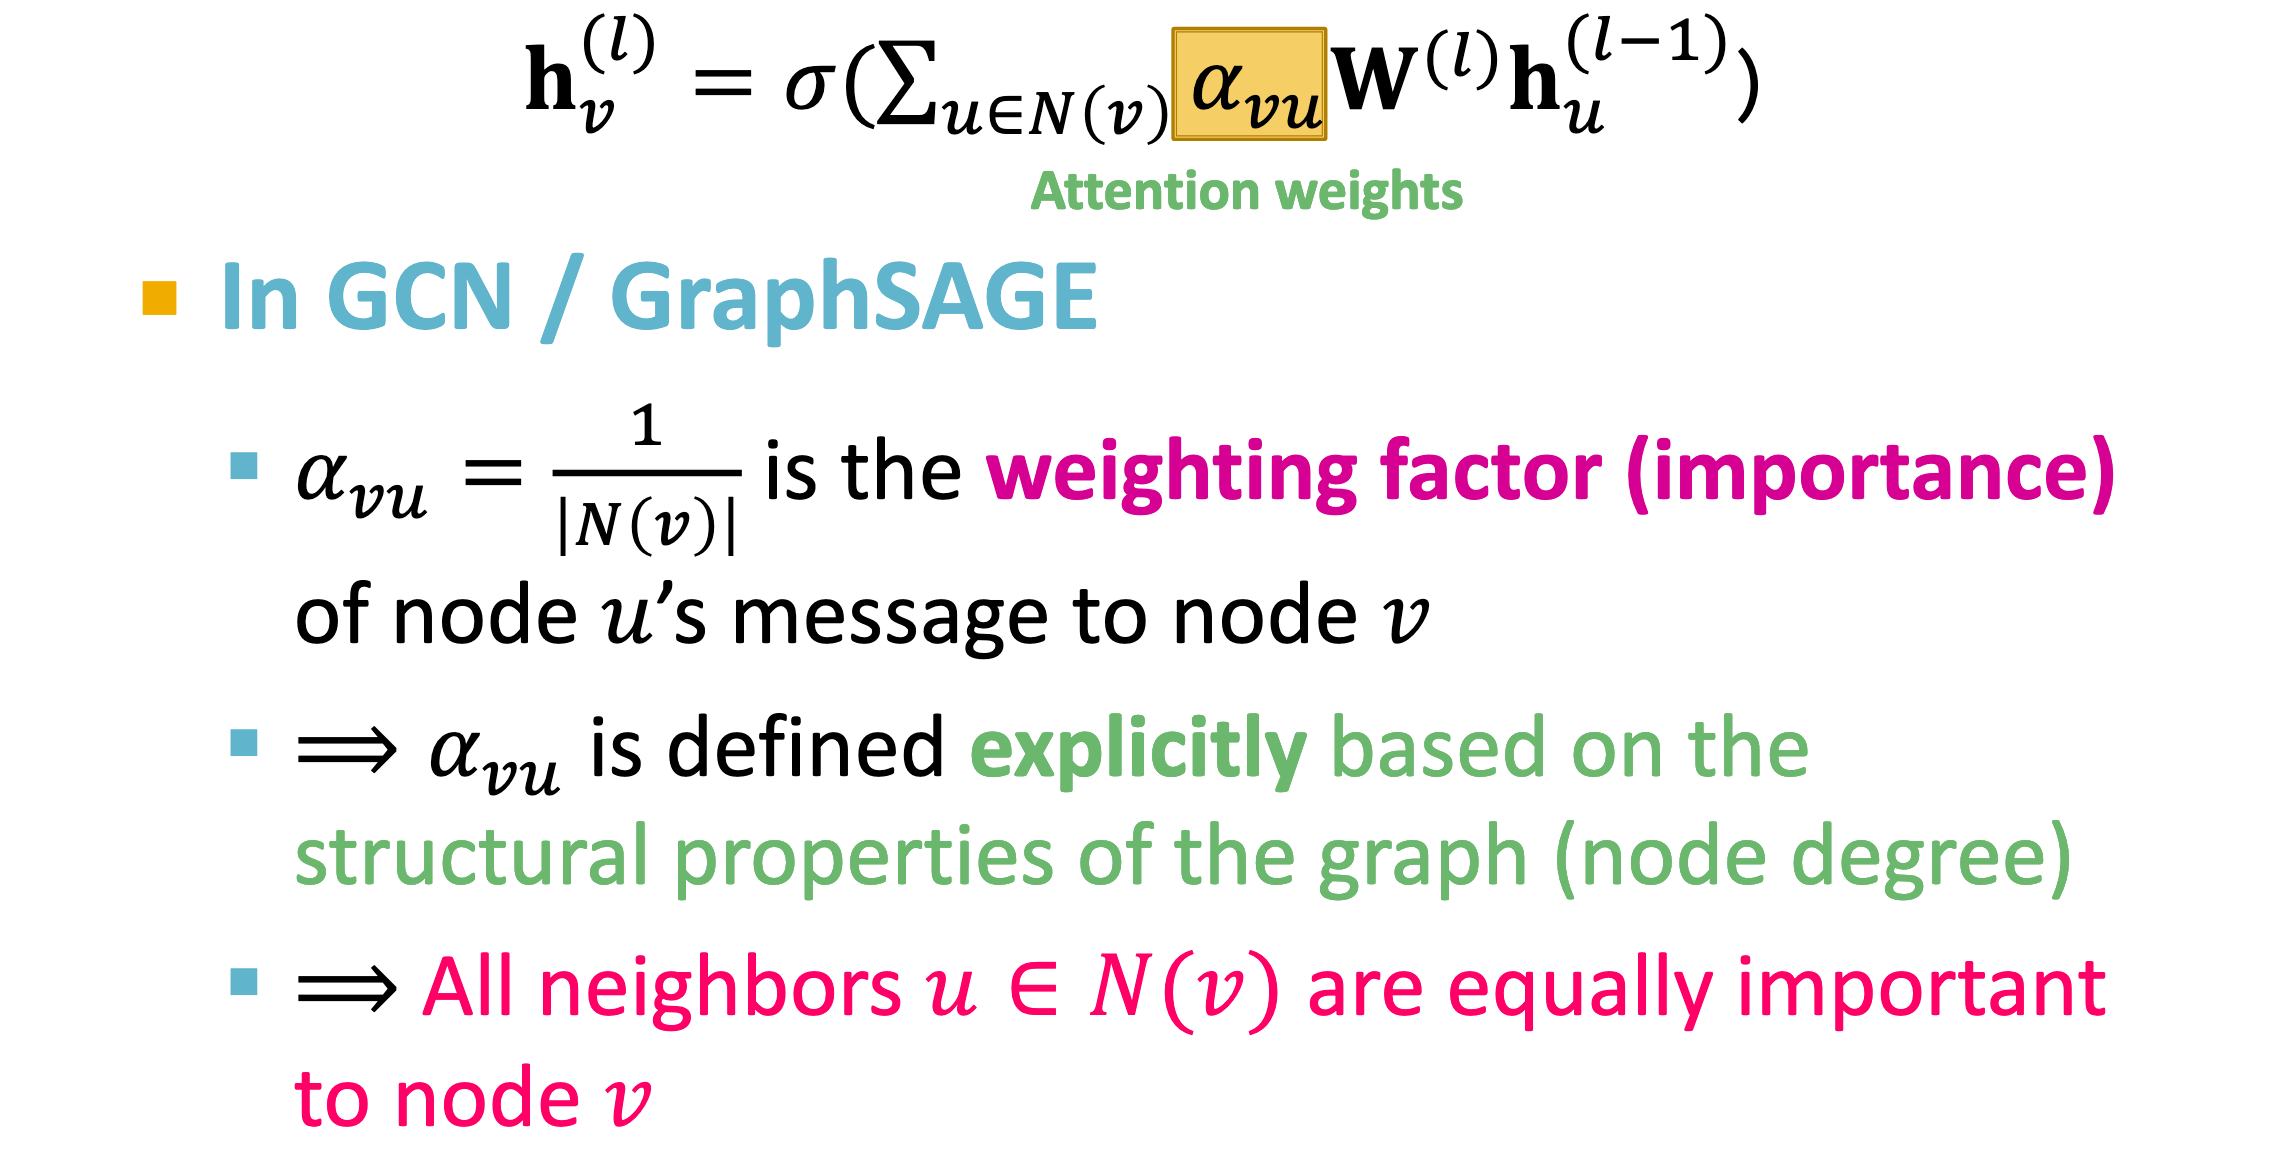

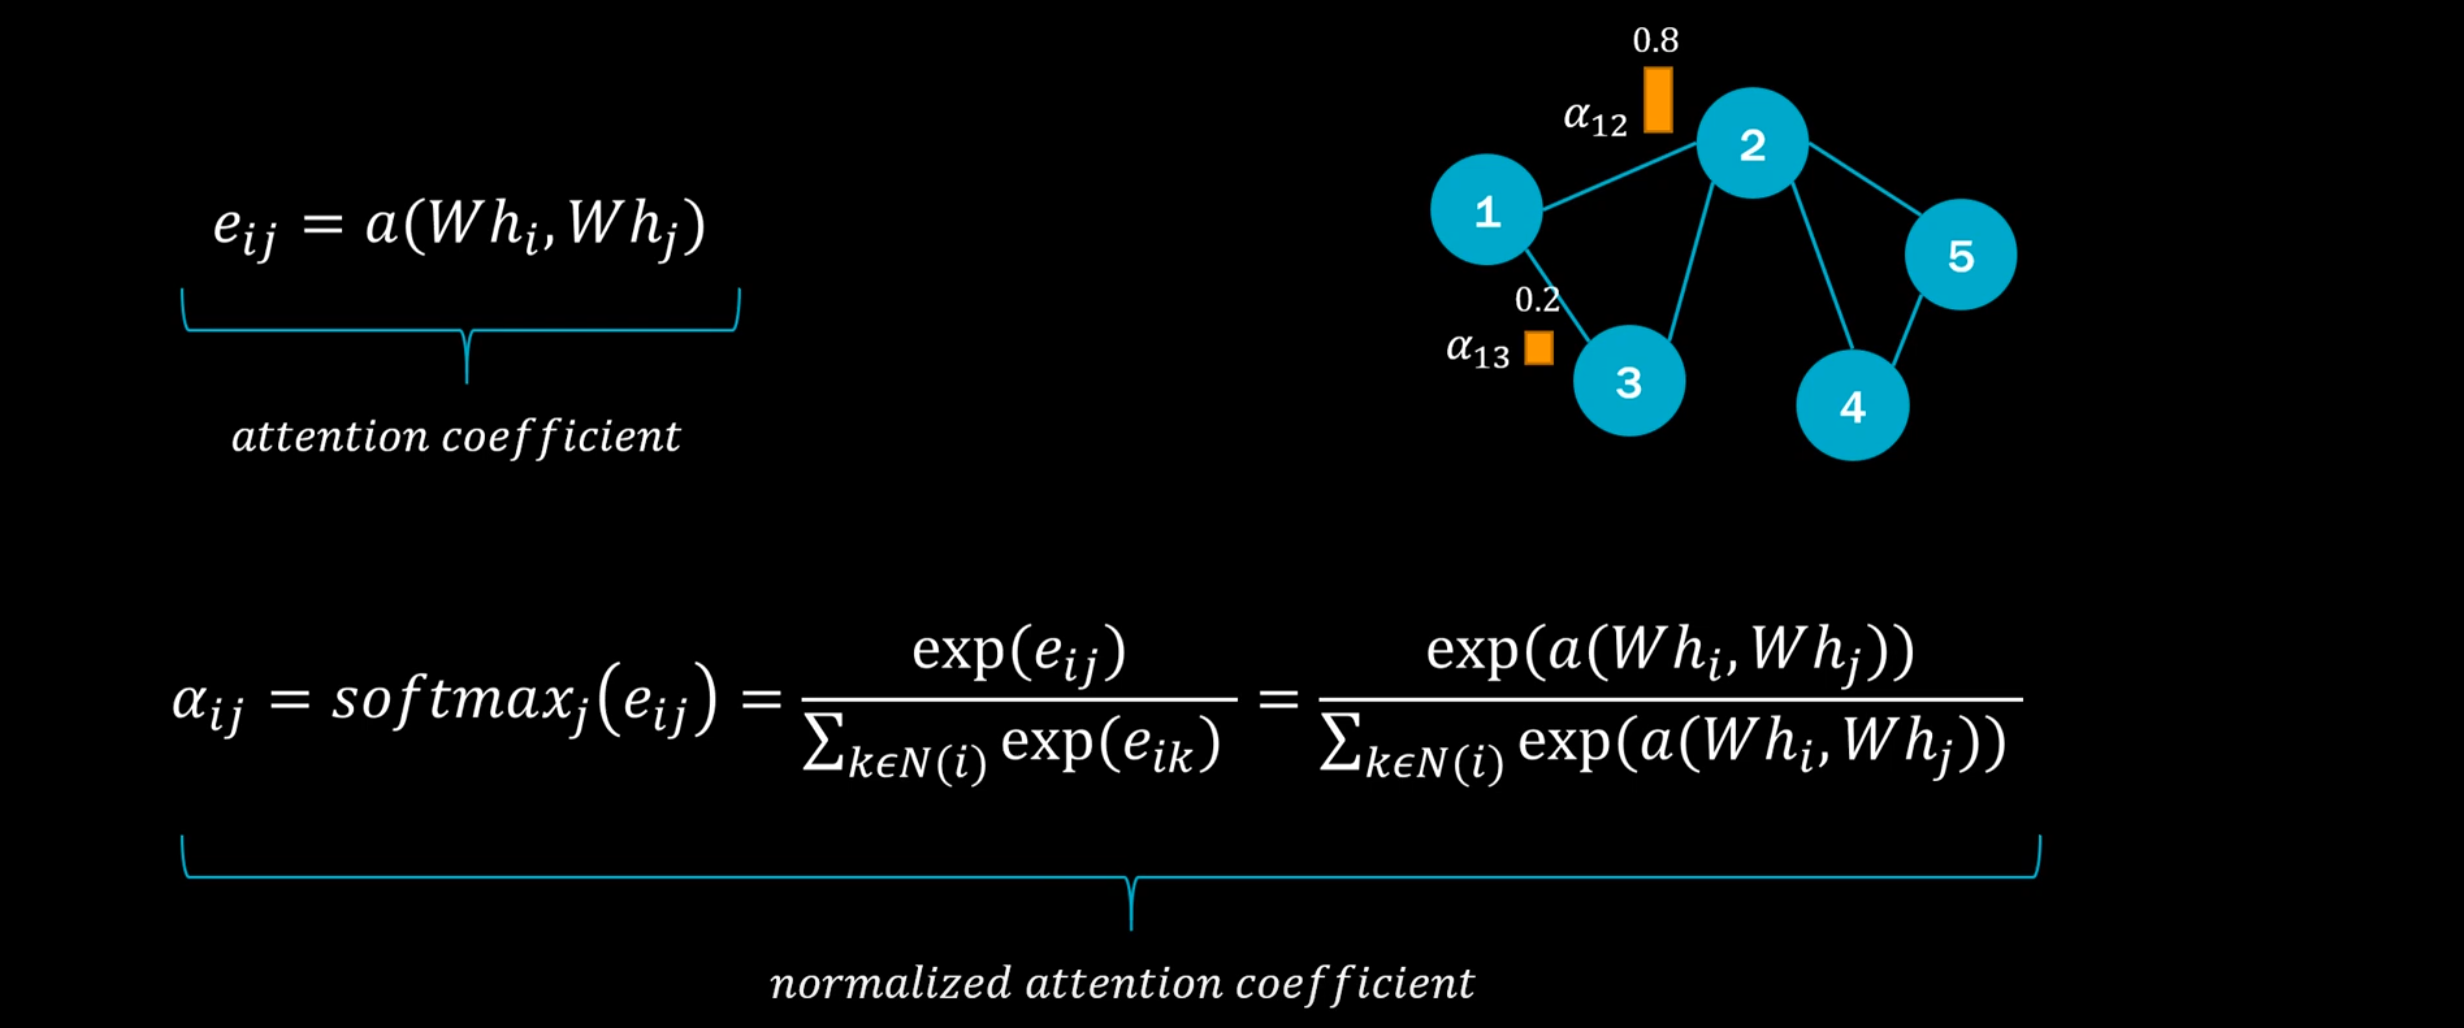

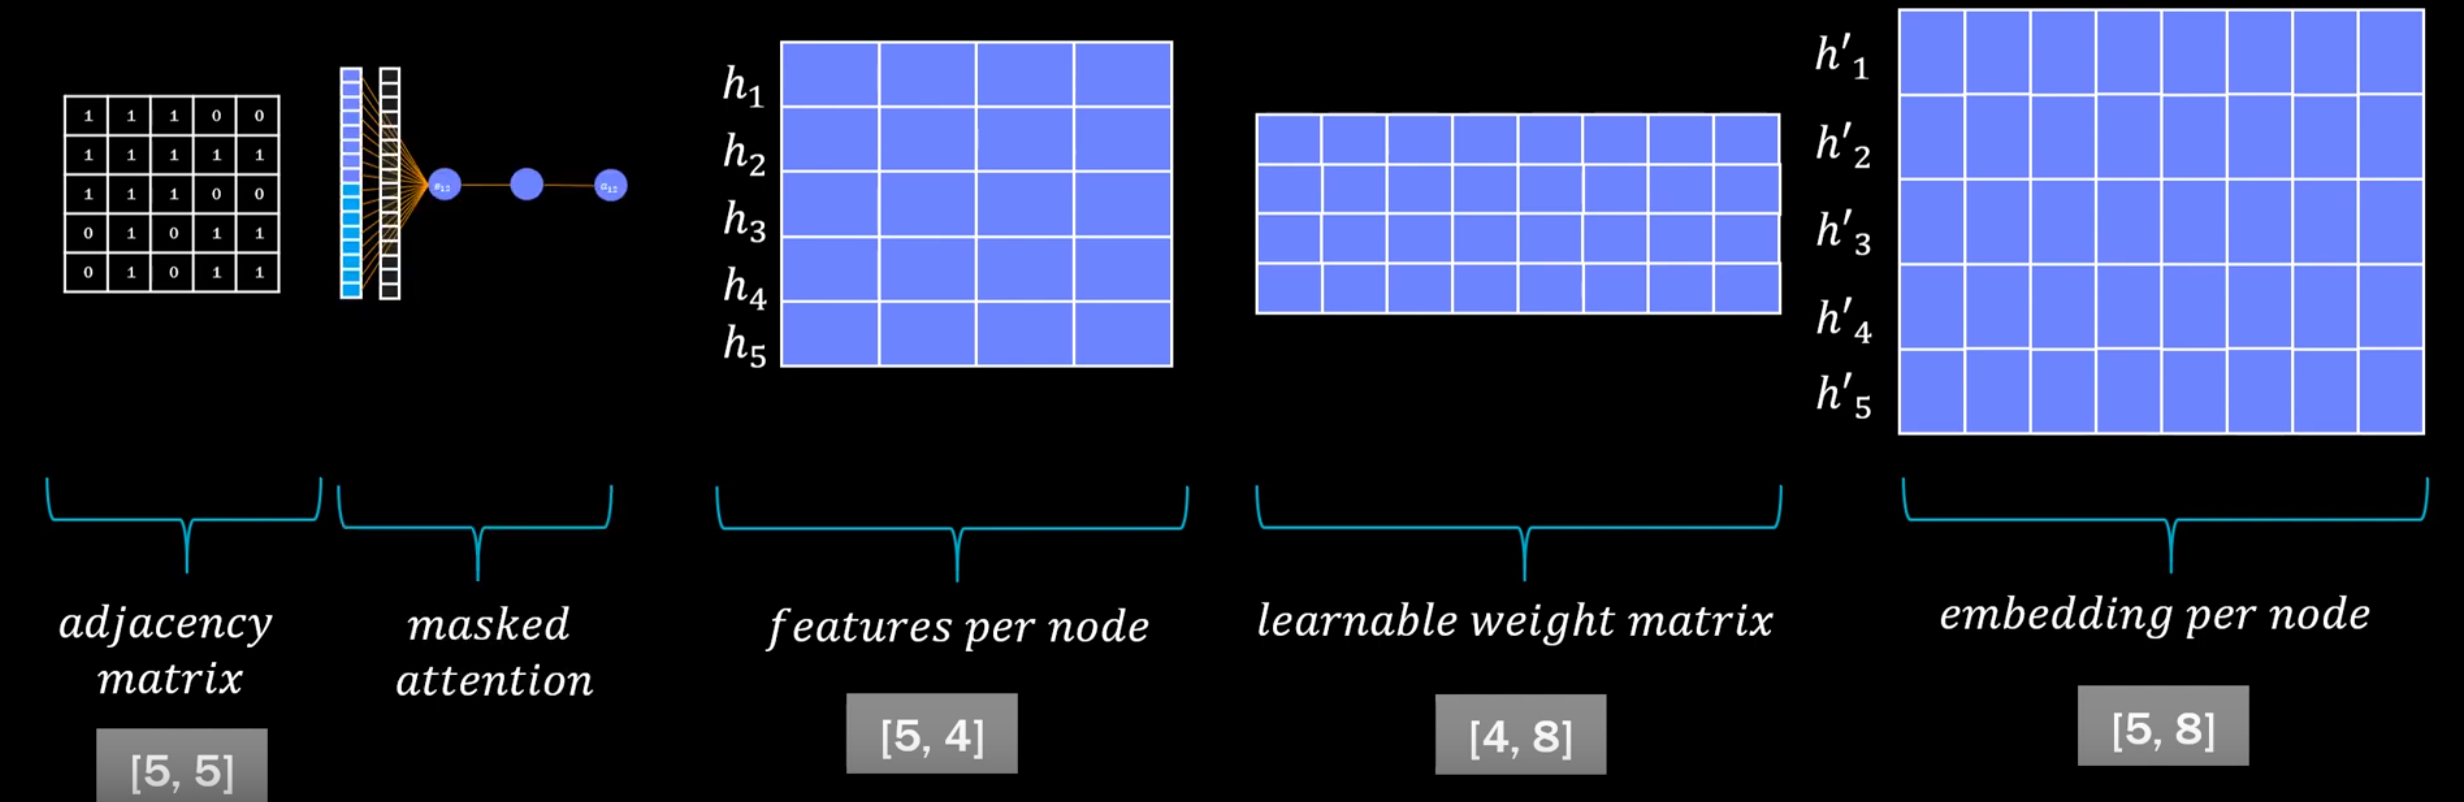

# Ejercicios para casa

(1) Prueba el modelo de clasificacion de grafos de MUTAG anterior incorporando pooling jerarquico. Para ello, debemos anadir capas de dense pooling
https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#dense-pooling-layers.

(2) Vuelve a realizar el modelo de clasificacion de nodos del CORA dataset usando el Graph Attention Network (https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GATConv).

# Links útiles

*   El repo de Github https://github.com/thunlp/GNNPapers contiene enlaces a multitud de artículos sobre metodología de GNNs, así como diversas aplicaciones en física, química o ciencias sociales.
*   Los autores de PyTorch Geometric han creado varios tutoriales en Google colab en los que he basado algunos de estos ejercicios. Si estáis interesados en XAI, aquí hay una breve intro para integrar PyTorch Geometric con la librería de explainability de PyTorch Captum https://colab.research.google.com/drive/1fLJbFPz0yMCQg81DdCP5I8jXw9LoggKO?usp=sharing.
* Nuevo libro de Geometric Deep Learning (Michael Bronstein et al.) https://arxiv.org/pdf/2104.13478.pdf.
* Benchmark datasets para deep learning en grafos https://ls11-www.cs.tu-dortmund.de/staff/morris/graphkerneldatasets.


